# Project 1: SAT & ACT Analysis


## Problem Statement

Analyse SAT and ACT Scores from previous years to provide Recommendations on where money can be spent to increase SAT participation rates.

## Executive Summary

### Contents:
- [Import Libraries](#Import-Libraries)
- [Data Import and Cleaning: 2017](#Data-Import-and-Cleaning:-2017)
- [Data Dictionary](#Data-Dictionary)
- [Data Import and Cleaning: 2018 and 2019](#Data-Import-and-Cleaning:-2018-and-2019)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Visualizations](#Visualization)
- [My Choice, top 3 states](#My-Choice,-top-3-states)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)
- [What Next!](#What-Next!)

## Import Libraries

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
## Importing all required libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import and Cleaning: 2017

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
## Creating backup dataframes,

sat2017_master = pd.read_csv('data/sat_2017.csv')
act2017_master = pd.read_csv('data/act_2017.csv')

In [3]:
## Will use these DataFrames instead,

sat2017 = sat2017_master.copy()
act2017 = act2017_master.copy()

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
## First 10 rows for SAT dataframe,
sat2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [5]:
## First 10 rows for ACT dataframe,
act2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

<p>The tables above displays US state-wise information on the SAT and ACT tests conducted for the year of 2017. The data comprises of the following,

1. SAT (2017) - Math, ERW section scores being marked out of 800 (each), along with Total Scores, marked out of 1600 and finally the Participation Rate in percentages.
    
2. ACT (2017) - English, Math, Reading and Science Section scores being marked out of 36, along with Composite Scores for all 4 sections marked out of 36, and the Participation Rates in percentage for the same year.
</p>
    
<p>Incosistent Datatype - Important thing to consider here is total SAT scores are marked in integer values while the ACT score are floating point numbers.</p>

<p> Few Columns and Cells are named inconsistently. Ex. Last value in ACT - Composite Column has an 'x' while it should be all numeric type.</p>
<p>
Lastly, I notice the ACT data has national average scores as first index while SAT seems to not provide that information.</p>

#### 4a. Does the data look complete? 

**Answer:**

No missing or null values for both dataframes. We will need to convert the dtype for participation and composite columns to int/float values.


In [6]:
## Lets check for any null/missing values and datatypes,

In [7]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

+ SAT - Math section has a minimim score if 52, we will consider this as an outlier of our dataset.
+ ACT - Science section has a minimum score of 2.3, we will consider this as an outlier of our dataset.

In [9]:
sat2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [10]:
act2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**Answer:**
+ The last index for ACT, under composite column the value contains additional characters that will be an obstacle later on. Lets change that.

In [11]:
sat2017.head(3)

State Participation  Evidence-Based Reading and Writing  Math  Total
0  Alabama            5%                                 593   572   1165
1   Alaska           38%                                 547   533   1080
2  Arizona           30%                                 563   553   1116

In [12]:
act2017.tail(3)

State Participation  English  Math  Reading  Science Composite
49  West Virginia           69%     20.0  19.4     21.2     20.5      20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6     20.2x

In [13]:
## 'Composite' column from ACT dataframe has 1 value
##  that might give us some issues later on, lets replace it.

In [14]:
##.iat helps access single value by integer position

act2017['Composite'].iat[-1]

'20.2x'

In [15]:
act2017['Composite'].iat[-1] = act2017['Composite'].iat[-1].replace('x','')
act2017.tail(2)

State Participation  English  Math  Reading  Science Composite
50  Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51    Wyoming          100%     19.4  19.8     20.8     20.6      20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
## Looks like the datatypes are inconsistent
## Ex. except the 'State' column everything should be either Float/Integer

act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

+ Yes. The 'Participation' & 'Composite' columns might have some missing values, they should be numeric. 
+ Also, looks like all other column can be either integers/floats except the 'State' column, which can be of object datatype.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
## Custom defined function - 
## Converts datatypes for select columns to Floating point numbers

def tonumeric(col):
    try:
        out = float(col)
    except:
        out = np.nan
    return out

## Returns NaN if fails to typecast.

- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
## First, remove '%' sign from 'Participation' column
## Second, drop the original 'Participation' column
## Third, .apply our custom function

sat2017['Participation_%'] = sat2017['Participation'].apply(lambda x:x.split("%")[0])
act2017['Participation_%'] = act2017['Participation'].apply(lambda x:x.split("%")[0])

In [20]:
## Drop original columns to avoid confusion / duplicate information

sat2017.drop('Participation',axis=1,inplace=True)
act2017.drop('Participation',axis=1,inplace=True)

In [21]:
sat2017['Participation_%'] = sat2017['Participation_%'].apply(tonumeric)
act2017['Participation_%'] = act2017['Participation_%'].apply(tonumeric)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
## Convert all other columns to float for consistency purposes

act2017['Composite'] = act2017['Composite'].apply(tonumeric)
sat2017['Evidence-Based Reading and Writing'] = sat2017['Evidence-Based Reading and Writing'].apply(tonumeric)
sat2017['Math'] = sat2017['Math'].apply(tonumeric)
sat2017['Total'] = sat2017['Total'].apply(tonumeric)

- Display the data types again to confirm they are correct.

In [23]:
sat2017.dtypes

State                                  object
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
Participation_%                       float64
dtype: object

In [24]:
act2017.dtypes

State               object
English            float64
Math               float64
Reading            float64
Science            float64
Composite          float64
Participation_%    float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018 and 2019, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
sat2017.columns

Index(['State', 'Evidence-Based Reading and Writing', 'Math', 'Total',
       'Participation_%'],
      dtype='object')

In [26]:
## Lets start by renaming the columns for SAT dataframe

sat2017.rename(columns={'State':'state',
                        'Evidence-Based Reading and Writing':'erw',
                        'Math':'math',
                        'Total':'total',
                        'Participation_%':'participation_percentage'
                       },inplace=True)

In [27]:
## Add suffix to each names

sat2017 = sat2017.add_suffix('_sat17')

In [28]:
## renaming columns for ACT dataframe

act2017.rename(columns={'State':'state',
                        'English':'english',
                        'Math':'math',
                        'Reading':'reading',
                        'Science':'science',
                        'Composite':'composite',
                        'Participation_%':'participation_percentage'
                       },inplace=True)

In [29]:
act2017 = act2017.add_suffix('_act17')

In [30]:
sat2017.columns

Index(['state_sat17', 'erw_sat17', 'math_sat17', 'total_sat17',
       'participation_percentage_sat17'],
      dtype='object')

In [31]:
act2017.columns

Index(['state_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17', 'participation_percentage_act17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Data Dictionary

<center><strong><span style="color:maroon"> SAT Scores (Scholastic Assessment Test) </span></strong></center>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|states (PK)|object|SAT| Names of different __US States__ ordered <br> alphabetically in ascending order |
|erw|object|SAT|Section score for Evidence based<br> Reading & Writing, marked<br> between __200 & 800__ | 
|math|object|SAT|Section score for Math,<br> marked between __200 & 800__ | 
|total|object|SAT|Sum of both the Section scores,<br> ranges from __400 to 1600__ | 
|participation_<br>percentage|float|SAT|__Percentage (%)__ of students from<br>each State that took the test|
|||| more on SAT scores [here][1]|

[1]: https://blog.prepscholar.com/sat-score-range "SAT Score"

 &nbsp;
 
<center><strong><span style="color:maroon"> ACT Scores (American College Testing) </span></strong> </center>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|states (PK)|object|ACT| Names of different __US States__ ordered <br> alphabetically in ascending order | 
|english|float|ACT|sub-core for English section,<br> ranges from __1 to 36__ | 
|math|float|ACT|sub-core for Math section,<br> ranges from __1 to 36__| 
|reading|float|ACT|sub-core for Reading section,<br> ranges from __1 to 36__| 
|science|float|ACT|sub-core for Science section,<br> ranges from __1 to 36__| 
|composite/<br>total|float|ACT|Mean (Average) score based on English,<br> Math, Reading and Science subscores,<br> also ranges from __1 to 36__|
|participation_<br>percentage|float|ACT|__Percentage (%)__ of students from<br>each State that took the test
|||| more on ACT scores [here][2]

[2]: https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html "ACT Score"

<br>
<center><sub>*NOTE: Suffix: Ex. _act17 or _sat17 in dataframes indicates features from ACT or SAT Test 2017<br>*(PK) Primary Key column</sub></center>

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

**Answer:**

+ ACT has 1 additional row ('National) compared to SAT.
+ In order to merge on columns later, we will need to have equal number of rows for all data frames. So the best solution is to drop that row. 

In [32]:
act2017.head(3)

state_act17  english_act17  math_act17  reading_act17  science_act17  \
0    National           20.3        20.7           21.4           21.0   
1     Alabama           18.9        18.4           19.7           19.4   
2      Alaska           18.7        19.8           20.4           19.9   

   composite_act17  participation_percentage_act17  
0             21.0                            60.0  
1             19.2                           100.0  
2             19.8                            65.0

In [33]:
## Drop the Index at position = 0

act2017.drop(0, inplace=True)

In [34]:
## Reset all index values to begin at 0, consistent with other dataframes

act2017.reset_index(inplace=True)

In [35]:
## Drop the old index column

act2017.drop('index',axis=1,inplace=True)

In [36]:
act2017.shape

(51, 7)

In [37]:
act2017.head(3)

state_act17  english_act17  math_act17  reading_act17  science_act17  \
0     Alabama           18.9        18.4           19.7           19.4   
1      Alaska           18.7        19.8           20.4           19.9   
2     Arizona           18.6        19.8           20.1           19.8   

   composite_act17  participation_percentage_act17  
0             19.2                           100.0  
1             19.8                            65.0  
2             19.7                            62.0

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [38]:
## Before we join both dataframes on state column
## lets rename it 'states' for both

sat2017.rename(columns={'state_sat17':'states'}, inplace=True)
act2017.rename(columns={'state_act17':'states'}, inplace=True)

In [39]:
## Merge sat_2017 & act_2017 dataframes - cleaned

sat_act_2017 = pd.merge(sat2017,act2017, on='states')

In [40]:
## Nothing looks suspicious with this dataframe

sat_act_2017.head(3)

states  erw_sat17  math_sat17  total_sat17  \
0  Alabama      593.0       572.0       1165.0   
1   Alaska      547.0       533.0       1080.0   
2  Arizona      563.0       553.0       1116.0   

   participation_percentage_sat17  english_act17  math_act17  reading_act17  \
0                             5.0           18.9        18.4           19.7   
1                            38.0           18.7        19.8           20.4   
2                            30.0           18.6        19.8           20.1   

   science_act17  composite_act17  participation_percentage_act17  
0           19.4             19.2                           100.0  
1           19.9             19.8                            65.0  
2           19.8             19.7                            62.0

In [41]:
sat_act_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [42]:
## Save using provided file name - without index

sat_act_2017.to_csv('data/combined_2017.csv', index=False)

## Data Import and Cleaning: 2018 and 2019

Read in the `sat_2018.csv`, `sat_2019.csv`, `act_2018.csv` and `act_2019.csv` files and assign them to appropriately named pandas dataframes. For the **2018-2019 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018-2019 data here as you were instructed in the previous sections above.

In [43]:
## Lets create backup dataframes

sat2018_master = pd.read_csv('data/sat_2018.csv')
act2018_master = pd.read_csv('data/act_2018.csv')

In [44]:
## 2019 data needs to be opened using different encoding type

sat2019_master = pd.read_csv('data/sat_2019.csv', encoding='ISO-8859-1')
act2019_master = pd.read_csv('data/act_2019.csv', encoding='ISO-8859-1')

In [45]:
## our dataframes to use

sat2018 = sat2018_master.copy()
act2018 = act2018_master.copy()
sat2019 = sat2019_master.copy()
act2019 = act2019_master.copy()

In [46]:
## First, remove '%' sign from 'Participation' column
## Second, drop the original 'Participation' column
## Third, .apply our custom function

sat2018['Participation_%'] = sat2018['Participation'].apply(lambda x:x.split("%")[0])
act2018['Participation_%'] = act2018['Participation'].apply(lambda x:x.split("%")[0])
sat2019['Participation_%'] = sat2019['Participation Rate'].apply(lambda x:x.split("%")[0])
act2019['Participation_%'] = act2019['Participation'].apply(lambda x:x.split("%")[0])

In [47]:
## Drop original columns to avoid confusion / duplicate information

sat2018.drop('Participation',axis=1,inplace=True)
act2018.drop('Participation',axis=1,inplace=True)
sat2019.drop('Participation Rate',axis=1,inplace=True)
act2019.drop('Participation',axis=1,inplace=True)

**Lets Clean SAT - 2019 dataframe first,**

In [48]:
sat2019.tail(10)

State  EBRW  Math  Total Participation_%
43       Tennessee   618   602   1220               7
44           Texas   515   507   1022              68
45            Utah   614   615   1230               4
46         Vermont   560   546   1106              66
47  Virgin Islands   490   445    935               Ñ
48        Virginia   567   551   1119              68
49      Washington   539   535   1074              70
50   West Virginia   483   460    943              99
51       Wisconsin   635   648   1283               3
52         Wyoming   623   615   1238               3

In [49]:
sat2019['Participation_%'].unique()

array(['7', '41', '31', '6', '63', '100', '94', '71', '54', '66', '3',
       '4', '5', '99', '82', '81', '9', '20', '95', '18', '79', '51', '2',
       '19', '22', '70', 'Ñ', '68'], dtype=object)

In [50]:
sat2019[sat2019['Participation_%'] == 'Ñ'][['State','Participation_%']]

State Participation_%
39     Puerto Rico               Ñ
47  Virgin Islands               Ñ

In [51]:
act2019['Participation_%'].unique()

array(['100', '38', '73', '23', '27', '22', '13', '32', '54', '49', '80',
       '31', '35', '29', '66', '72', '6', '28', '21', '19', '95', '82',
       '14', '25', '63', '96', '42', '17', '12', '78', '75', '39', '20',
       '24', '52'], dtype=object)

In [52]:
## Looks like States with missing participation information are
## new additions for the list (39 - Peurto Rico, 47 - Virgin Islands)
## Without 'Participation_%' and being only present for 2019 - they won't be of much use for us.
## Lets drop them, reset the index and delete the old index column

In [53]:
## Drop those 2 index values

sat2019.drop([39,47], inplace=True)

In [54]:
## Reset the index to be consistent with other dataframes

sat2019.reset_index(inplace=True)

In [55]:
## Drop duplicate index column

sat2019.drop(columns=['index'], inplace=True)

In [56]:
sat2019.shape

(51, 5)

**Clean ACT - 2019 dataframe**

In [57]:
act2019.tail(10)

State  Composite Participation_%
42      Tennessee       19.4             100
43          Texas       20.5              39
44           Utah       20.3             100
45        Vermont       24.1              20
46       Virginia       24.0              21
47     Washington       22.1              24
48  West Virginia       20.8              49
49      Wisconsin       20.3             100
50        Wyoming       19.8             100
51       National       20.7              52

In [58]:
## This dataframe has an additional "National" Row at index 51.
## Test -> In reality we know that no such state exists.
## Lets drop that index

act2019.drop([51],inplace=True)

In [59]:
act2019.shape

(51, 3)

**Clean SAT & ACT - 2018 dataframes**

In [60]:
act2018.iloc[15:25]

State  Composite Participation_%
15           Iowa       21.8              68
16         Kansas       21.6              71
17       Kentucky       20.2             100
18      Louisiana       19.2             100
19          Maine       24.0               7
20          Maine       24.0               7
21       Maryland       22.5              31
22  Massachusetts       25.5              25
23       Michigan       24.2              22
24      Minnesota       21.3              99

In [61]:
act2018.drop(20, inplace=True)
act2018.reset_index(inplace=True)
act2018.drop('index',axis=1, inplace=True)

In [62]:
act2018.shape

(51, 3)

In [63]:
act2018.head(10)

State  Composite Participation_%
0               Alabama       19.1             100
1                Alaska       20.8              33
2               Arizona       19.2              66
3              Arkansas       19.4             100
4            California       22.7              27
5              Colorado       23.9              30
6           Connecticut       25.6              26
7              Delaware       23.8              17
8  District of columbia       23.6              32
9               Florida       19.9              66

In [64]:
## Convert all columns to be numeric (float here) and rename features

sat2018['Participation_%'] = sat2018['Participation_%'].apply(tonumeric)
act2018['Participation_%'] = act2018['Participation_%'].apply(tonumeric)
sat2019['Participation_%'] = sat2019['Participation_%'].apply(tonumeric)
act2019['Participation_%'] = act2019['Participation_%'].apply(tonumeric)

In [65]:
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   EBRW             51 non-null     int64  
 2   Math             51 non-null     int64  
 3   Total            51 non-null     int64  
 4   Participation_%  51 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [66]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   Composite        51 non-null     float64
 2   Participation_%  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [67]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Evidence-Based Reading and Writing  51 non-null     int64  
 2   Math                                51 non-null     int64  
 3   Total                               51 non-null     int64  
 4   Participation_%                     51 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [68]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   Composite        51 non-null     float64
 2   Participation_%  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [69]:
## Inconsistent datatypes and column names

In [70]:
sat2018.rename(columns={'State':'state','Evidence-Based Reading and Writing':'erw','Math':'math','Total':'total','Participation_%':'participation_percentage'},inplace=True)
act2018.rename(columns={'State':'state','Composite':'composite','Participation_%':'participation_percentage'},inplace=True)
sat2019.rename(columns={'State':'state','EBRW':'erw','Math':'math','Total':'total','Participation_%':'participation_percentage'},inplace=True)
act2019.rename(columns={'State':'state','Composite':'composite','Participation_%':'participation_percentage'},inplace=True)

In [71]:
## add suffix

sat2018 = sat2018.add_suffix('_sat18')
act2018 = act2018.add_suffix('_act18')
sat2019 = sat2019.add_suffix('_sat19')
act2019 = act2019.add_suffix('_act19')

In [72]:
## convert all columns to floats

sat2018['total_sat18'] = sat2018['total_sat18'].apply(tonumeric)
sat2018['erw_sat18'] = sat2018['erw_sat18'].apply(tonumeric)
sat2018['math_sat18'] = sat2018['math_sat18'].apply(tonumeric)

sat2019['total_sat19'] = sat2019['total_sat19'].apply(tonumeric)
sat2019['erw_sat19'] = sat2019['erw_sat19'].apply(tonumeric)
sat2019['math_sat19'] = sat2019['math_sat19'].apply(tonumeric)

In [73]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state_sat18                     51 non-null     object 
 1   erw_sat18                       51 non-null     float64
 2   math_sat18                      51 non-null     float64
 3   total_sat18                     51 non-null     float64
 4   participation_percentage_sat18  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state_act18                     51 non-null     object 
 1   composite_act18                 51 non-null     float64
 2   participation_percentage_act18  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [75]:
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state_sat19                     51 non-null     object 
 1   erw_sat19                       51 non-null     float64
 2   math_sat19                      51 non-null     float64
 3   total_sat19                     51 non-null     float64
 4   participation_percentage_sat19  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [76]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state_act19                     51 non-null     object 
 1   composite_act19                 51 non-null     float64
 2   participation_percentage_act19  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [77]:
## Primary Key Column before we merge
## We can definitely use on_left and on_right merge, but I feel this is easier for me.

## all 'states'

sat2018.rename(columns={'state_sat18':'states'},inplace=True)
sat2019.rename(columns={'state_sat19':'states'},inplace=True)
act2018.rename(columns={'state_act18':'states'}, inplace=True)
act2019.rename(columns={'state_act19':'states'}, inplace=True)

**Before we commit - state 'District Of Columbia' needs to be consistent across all dataframe**

In [78]:
## Index ID 8 'District of Columbia' is not consistently named across
## all dataframes, lets rename it for the following dataframes,

## act2018, sat,2018, act2019, sat2019 and sat_act_2017 (already merged)

## Soln: titlecase all state names

In [79]:
## for Merged 2017 (sat_act) dataframe,

sat_act_2017['states'] = [state.title() for state in sat_act_2017['states']]

In [80]:
sat2018['states'] = [state.title() for state in sat2018['states']]
sat2019['states'] = [state.title() for state in sat2019['states']]

act2018['states'] = [state.title() for state in act2018['states']]
act2019['states'] = [state.title() for state in act2019['states']]

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [81]:
## Merge 2018 (SAT+ACT)

sat_act_2018 = pd.merge(sat2018,act2018,on='states')

In [82]:
## Merge 2019 (SAT+ACT)

sat_act_2019 = pd.merge(sat2019,act2019,on='states')

In [83]:
## We already have

sat_act_2017.head(0)

Empty DataFrame
Columns: [states, erw_sat17, math_sat17, total_sat17, participation_percentage_sat17, english_act17, math_act17, reading_act17, science_act17, composite_act17, participation_percentage_act17]
Index: []

In [84]:
sat_act_2017.shape

(51, 11)

In [85]:
sat_act_2018.shape

(51, 7)

In [86]:
sat_act_2019.shape

(51, 7)

In [87]:
### Merge 3 dataframes simultaneously on 1 key

sat_act_2017_18_19 = sat_act_2017.merge(sat_act_2018,on='states').merge(sat_act_2019,on='states')

In [88]:
sat_act_2017_18_19.head(3)

states  erw_sat17  math_sat17  total_sat17  \
0  Alabama      593.0       572.0       1165.0   
1   Alaska      547.0       533.0       1080.0   
2  Arizona      563.0       553.0       1116.0   

   participation_percentage_sat17  english_act17  math_act17  reading_act17  \
0                             5.0           18.9        18.4           19.7   
1                            38.0           18.7        19.8           20.4   
2                            30.0           18.6        19.8           20.1   

   science_act17  composite_act17  ...  total_sat18  \
0           19.4             19.2  ...       1166.0   
1           19.9             19.8  ...       1106.0   
2           19.8             19.7  ...       1149.0   

   participation_percentage_sat18  composite_act18  \
0                             6.0             19.1   
1                            43.0             20.8   
2                            29.0             19.2   

   participation_percentage_act18  erw_sat19  math_sat19  total_sat19  \
0                           100.0      583.0       560.0       1143.0   
1                            33.0      556.0       541.0       1097.0   
2                            66.0      569.0       565.0       1134.0   

   participation_percentage_sat19  composite_act19  \
0                             7.0             18.9   
1                            41.0             20.1   
2                            31.0             19.0   

   participation_percentage_act19  
0                           100.0  
1                            38.0  
2                            73.0  

[3 rows x 23 columns]

In [89]:
sat_act_2017_18_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   states                          51 non-null     object 
 1   erw_sat17                       51 non-null     float64
 2   math_sat17                      51 non-null     float64
 3   total_sat17                     51 non-null     float64
 4   participation_percentage_sat17  51 non-null     float64
 5   english_act17                   51 non-null     float64
 6   math_act17                      51 non-null     float64
 7   reading_act17                   51 non-null     float64
 8   science_act17                   51 non-null     float64
 9   composite_act17                 51 non-null     float64
 10  participation_percentage_act17  51 non-null     float64
 11  erw_sat18                       51 non-null     float64
 12  math_sat18                      51 non

In [90]:
## Reorder all columns & rename + add Prefix as needed

## Drop invidual section marks for ACT scores as we do not 
## have data from other years to compare with.

## Can always use sat_act_2017 dataframe for detailed act_2017 information


In [91]:
sat_act_2017_18_19.drop(columns=['english_act17','math_act17','reading_act17','science_act17'],inplace=True)

In [92]:
sat_act_2017_18_19.columns

Index(['states', 'erw_sat17', 'math_sat17', 'total_sat17',
       'participation_percentage_sat17', 'composite_act17',
       'participation_percentage_act17', 'erw_sat18', 'math_sat18',
       'total_sat18', 'participation_percentage_sat18', 'composite_act18',
       'participation_percentage_act18', 'erw_sat19', 'math_sat19',
       'total_sat19', 'participation_percentage_sat19', 'composite_act19',
       'participation_percentage_act19'],
      dtype='object')

In [93]:
columns_renamed = {
    'states':'states',
    'erw_sat17':'sat17_erw',
    'erw_sat18':'sat18_erw',
    'erw_sat19':'sat19_erw',
    'math_sat17':'sat17_math',
    'math_sat18':'sat18_math',
    'math_sat19':'sat19_math',
    'total_sat17':'sat17_total',
    'total_sat18':'sat18_total',
    'total_sat19':'sat19_total',
    'participation_percentage_sat17':'sat17_participation_percent',
    'participation_percentage_sat18':'sat18_participation_percent',
    'participation_percentage_sat19':'sat19_participation_percent',
    'composite_act17':'act17_total',
    'composite_act18':'act18_total',
    'composite_act19':'act19_total',
    'participation_percentage_act17':'act17_participation_percent',
    'participation_percentage_act18':'act18_participation_percent',
    'participation_percentage_act19':'act19_participation_percent'
                  }
sat_act_2017_18_19.rename(columns=columns_renamed,inplace=True)
sat_act_2017_18_19.head()

states  sat17_erw  sat17_math  sat17_total  \
0     Alabama      593.0       572.0       1165.0   
1      Alaska      547.0       533.0       1080.0   
2     Arizona      563.0       553.0       1116.0   
3    Arkansas      614.0       594.0       1208.0   
4  California      531.0       524.0       1055.0   

   sat17_participation_percent  act17_total  act17_participation_percent  \
0                          5.0         19.2                        100.0   
1                         38.0         19.8                         65.0   
2                         30.0         19.7                         62.0   
3                          3.0         19.4                        100.0   
4                         53.0         22.8                         31.0   

   sat18_erw  sat18_math  sat18_total  sat18_participation_percent  \
0      595.0       571.0       1166.0                          6.0   
1      562.0       544.0       1106.0                         43.0   
2      577.0       572.0       1149.0                         29.0   
3      592.0       576.0       1169.0                          5.0   
4      540.0       536.0       1076.0                         60.0   

   act18_total  act18_participation_percent  sat19_erw  sat19_math  \
0         19.1                        100.0      583.0       560.0   
1         20.8                         33.0      556.0       541.0   
2         19.2                         66.0      569.0       565.0   
3         19.4                        100.0      582.0       559.0   
4         22.7                         27.0      534.0       531.0   

   sat19_total  sat19_participation_percent  act19_total  \
0       1143.0                          7.0         18.9   
1       1097.0                         41.0         20.1   
2       1134.0                         31.0         19.0   
3       1141.0                          6.0         19.3   
4       1065.0                         63.0         22.6   

   act19_participation_percent  
0                        100.0  
1                         38.0  
2                         73.0  
3                        100.0  
4                         23.0

In [94]:
## Reorder columns using .reindex()

sat_act_2017_18_19 = sat_act_2017_18_19.reindex(['states',
                                 'sat17_erw','sat18_erw','sat19_erw',
                                 'sat17_math','sat18_math','sat19_math',
                                 'sat17_total','sat18_total','sat19_total',
                                 'sat17_participation_percent','sat18_participation_percent','sat19_participation_percent',
                                 'act17_total','act18_total','act19_total',
                                 'act17_participation_percent','act18_participation_percent','act19_participation_percent'],
                               axis=1)

In [95]:
sat_act_2017_18_19.tail()

states  sat17_erw  sat18_erw  sat19_erw  sat17_math  sat18_math  \
46       Virginia      561.0      567.0      567.0       541.0       550.0   
47     Washington      541.0      543.0      539.0       534.0       538.0   
48  West Virginia      558.0      513.0      483.0       528.0       486.0   
49      Wisconsin      642.0      641.0      635.0       649.0       653.0   
50        Wyoming      626.0      633.0      623.0       604.0       625.0   

    sat19_math  sat17_total  sat18_total  sat19_total  \
46       551.0       1102.0       1117.0       1119.0   
47       535.0       1075.0       1081.0       1074.0   
48       460.0       1086.0        999.0        943.0   
49       648.0       1291.0       1294.0       1283.0   
50       615.0       1230.0       1257.0       1238.0   

    sat17_participation_percent  sat18_participation_percent  \
46                         65.0                         68.0   
47                         64.0                         69.0   
48                         14.0                         28.0   
49                          3.0                          3.0   
50                          3.0                          3.0   

    sat19_participation_percent  act17_total  act18_total  act19_total  \
46                         68.0         23.8         23.9         24.0   
47                         70.0         21.9         22.2         22.1   
48                         99.0         20.4         20.3         20.8   
49                          3.0         20.5         20.5         20.3   
50                          3.0         20.2         20.0         19.8   

    act17_participation_percent  act18_participation_percent  \
46                         29.0                         24.0   
47                         29.0                         24.0   
48                         69.0                         65.0   
49                        100.0                        100.0   
50                        100.0                        100.0   

    act19_participation_percent  
46                         21.0  
47                         24.0  
48                         49.0  
49                        100.0  
50                        100.0

**Save the file - 2017-2018-2019 (SAT + ACT) merged - final.csv**

In [96]:
## Index=0 to not save our index column

sat_act_2017_18_19.to_csv('data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [97]:
## Lets re-import our final.csv

## first into master dataframe

clean_sat_act_2017_18_19_master = pd.read_csv('data/final.csv')

In [98]:
clean_sat_act_2017_18_19 = clean_sat_act_2017_18_19_master.copy()

In [99]:
clean_sat_act_2017_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   states                       51 non-null     object 
 1   sat17_erw                    51 non-null     float64
 2   sat18_erw                    51 non-null     float64
 3   sat19_erw                    51 non-null     float64
 4   sat17_math                   51 non-null     float64
 5   sat18_math                   51 non-null     float64
 6   sat19_math                   51 non-null     float64
 7   sat17_total                  51 non-null     float64
 8   sat18_total                  51 non-null     float64
 9   sat19_total                  51 non-null     float64
 10  sat17_participation_percent  51 non-null     float64
 11  sat18_participation_percent  51 non-null     float64
 12  sat19_participation_percent  51 non-null     float64
 13  act17_total           

In [100]:
desc_17_18_19 = clean_sat_act_2017_18_19.describe()

In [101]:
## Transpose using .T or .transpose()

desc_17_18_19.T

count         mean        std    min      25%  \
sat17_erw                     51.0   569.117647  45.666901  482.0   533.50   
sat18_erw                     51.0   563.686275  47.502627  480.0   534.50   
sat19_erw                     51.0   560.803922  46.248035  483.0   527.50   
sat17_math                    51.0   547.627451  84.909119   52.0   522.00   
sat18_math                    51.0   556.235294  47.772623  480.0   522.50   
sat19_math                    51.0   552.196078  51.290553  460.0   511.50   
sat17_total                   51.0  1126.098039  92.494812  950.0  1055.50   
sat18_total                   51.0  1120.019608  94.155083  977.0  1057.50   
sat19_total                   51.0  1113.078431  97.197910  943.0  1038.00   
sat17_participation_percent   51.0    39.803922  35.276632    2.0     4.00   
sat18_participation_percent   51.0    45.745098  37.314256    2.0     4.50   
sat19_participation_percent   51.0    49.058824  38.747600    2.0     5.50   
act17_total                   51.0    21.519608   2.020695   17.8    19.80   
act18_total                   51.0    21.496078   2.111583   17.7    19.95   
act19_total                   51.0    21.464706   2.194523   17.9    19.80   
act17_participation_percent   51.0    65.254902  32.140842    8.0    31.00   
act18_participation_percent   51.0    61.725490  34.037085    7.0    28.50   
act19_participation_percent   51.0    58.666667  34.515890    6.0    24.50   

                                50%      75%     max  
sat17_erw                     559.0   613.00   644.0  
sat18_erw                     552.0   610.50   643.0  
sat19_erw                     550.0   612.00   636.0  
sat17_math                    548.0   599.00   651.0  
sat18_math                    544.0   593.50   655.0  
sat19_math                    546.0   599.00   648.0  
sat17_total                  1107.0  1212.00  1295.0  
sat18_total                  1098.0  1204.00  1298.0  
sat19_total                  1097.0  1210.00  1284.0  
sat17_participation_percent    38.0    66.00   100.0  
sat18_participation_percent    52.0    77.50   100.0  
sat19_participation_percent    54.0    82.00   100.0  
act17_total                    21.4    23.60    25.5  
act18_total                    21.3    23.65    25.6  
act19_total                    21.1    23.70    25.5  
act17_participation_percent    69.0   100.00   100.0  
act18_participation_percent    66.0   100.00   100.0  
act19_participation_percent    54.0   100.00   100.0

In [102]:
## lets double check any value with our initial dataframe

## Ex. SAT 2017 - 2018  mean score and test total

print(sat2017_master['Math'].std(),sat2018_master['Math'].std())

84.90911865855486 47.77262322095955


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [103]:
## Calculate Standard Deviation,

def checkStdDev(col):
    dist = 0
    for item in col:
        dist += (item - (sum(col)/len(col))) **2
    return round(float((dist / len(col)) ** 0.5),3)

In [104]:
## Test Functio with 1 column
checkStdDev(act2017['composite_act17'])

2.001

In [105]:
## Test using Numpy std function
round(np.std((act2017['composite_act17'])),3)

2.001

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [106]:
clean_sat_act_2017_18_19.shape

(51, 19)

In [107]:
## Mask to cover all columns except for the categorical 'States' column

num_col = clean_sat_act_2017_18_19.iloc[:,1:]

In [108]:
num_col.shape

(51, 18)

In [109]:
## test - using my defined function

checkStdDev(num_col['act17_total']) 

2.001

In [110]:
## Using Dictionary Comprehension
sd = {k:checkStdDev(num_col[k]) for k in num_col.keys()}
sd

{'sat17_erw': 45.217,
 'sat18_erw': 47.035,
 'sat19_erw': 45.792,
 'sat17_math': 84.073,
 'sat18_math': 47.302,
 'sat19_math': 50.785,
 'sat17_total': 91.584,
 'sat18_total': 93.227,
 'sat19_total': 96.24,
 'sat17_participation_percent': 34.929,
 'sat18_participation_percent': 36.947,
 'sat19_participation_percent': 38.366,
 'act17_total': 2.001,
 'act18_total': 2.091,
 'act19_total': 2.173,
 'act17_participation_percent': 31.824,
 'act18_participation_percent': 33.702,
 'act19_participation_percent': 34.176}

In [111]:
## Test - using numpy's std() method

{k:round(np.std((num_col[k])),3) for k in num_col.keys()}

{'sat17_erw': 45.217,
 'sat18_erw': 47.035,
 'sat19_erw': 45.792,
 'sat17_math': 84.073,
 'sat18_math': 47.302,
 'sat19_math': 50.785,
 'sat17_total': 91.584,
 'sat18_total': 93.227,
 'sat19_total': 96.24,
 'sat17_participation_percent': 34.929,
 'sat18_participation_percent': 36.947,
 'sat19_participation_percent': 38.366,
 'act17_total': 2.001,
 'act18_total': 2.091,
 'act19_total': 2.173,
 'act17_participation_percent': 31.824,
 'act18_participation_percent': 33.702,
 'act19_participation_percent': 34.176}

In [112]:
## Perfecto!

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 

The manually calculated standard deviations are preety close to the output from pandas 'describe' method. While with numpy's 'std' method, it matches perfectly.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [113]:
clean_sat_act_2017_18_19.iloc[:,10:13].head()

sat17_participation_percent  sat18_participation_percent  \
0                          5.0                          6.0   
1                         38.0                         43.0   
2                         30.0                         29.0   
3                          3.0                          5.0   
4                         53.0                         60.0   

   sat19_participation_percent  
0                          7.0  
1                         41.0  
2                         31.0  
3                          6.0  
4                         63.0

In [114]:
final_17_18_19_sat_act = clean_sat_act_2017_18_19.set_index('states')

In [115]:
final_17_18_19_sat_act['sat17_erw'].max() ## Maximum_erw_score

644.0

**Max_Min Participation (%) for each year** 

In [116]:
 ##sat17_max_min_participation
max_min_sat17_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat17_participation_percent'] == final_17_18_19_sat_act['sat17_participation_percent'].max()) |
    (final_17_18_19_sat_act['sat17_participation_percent'] == final_17_18_19_sat_act['sat17_participation_percent'].min())
    ][['sat17_total','sat17_participation_percent']].sort_values(by='sat17_participation_percent')

max_min_sat17_participation_percent

sat17_total  sat17_participation_percent
states                                                        
Iowa                       1275.0                          2.0
Mississippi                1242.0                          2.0
North Dakota               1256.0                          2.0
Connecticut                1041.0                        100.0
Delaware                    996.0                        100.0
District Of Columbia        950.0                        100.0
Michigan                   1005.0                        100.0

In [117]:
##sat18_max_min_participation
max_min_sat18_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat18_participation_percent'] == final_17_18_19_sat_act['sat18_participation_percent'].max()) |
    (final_17_18_19_sat_act['sat18_participation_percent'] == final_17_18_19_sat_act['sat18_participation_percent'].min())
    ][['sat18_total','sat18_participation_percent']].sort_values(by='sat18_participation_percent')

max_min_sat18_participation_percent

sat18_total  sat18_participation_percent
states                                                
North Dakota       1283.0                          2.0
Colorado           1025.0                        100.0
Connecticut        1053.0                        100.0
Delaware            998.0                        100.0
Idaho              1001.0                        100.0
Michigan           1011.0                        100.0

In [118]:
##sat19_max_min_participation
max_min_sat18_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat19_participation_percent'] == final_17_18_19_sat_act['sat19_participation_percent'].max()) |
    (final_17_18_19_sat_act['sat19_participation_percent'] == final_17_18_19_sat_act['sat19_participation_percent'].min())
    ][['sat19_total','sat19_participation_percent']].sort_values(by='sat19_participation_percent')

max_min_sat18_participation_percent

sat19_total  sat19_participation_percent
states                                                
North Dakota       1263.0                          2.0
Colorado           1024.0                        100.0
Connecticut        1046.0                        100.0
Delaware            985.0                        100.0
Florida             999.0                        100.0
Idaho               993.0                        100.0
Illinois           1013.0                        100.0
Michigan           1003.0                        100.0
Rhode Island        995.0                        100.0

In [119]:
##act17_max_min_participation
max_min_act17_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act17_participation_percent'] == final_17_18_19_sat_act['act17_participation_percent'].max()) |
    (final_17_18_19_sat_act['act17_participation_percent'] == final_17_18_19_sat_act['act17_participation_percent'].min())
    ][['act17_total','act17_participation_percent']].sort_values(by='act17_participation_percent')

max_min_act17_participation_percent

act17_total  act17_participation_percent
states                                                  
Maine                  24.3                          8.0
Alabama                19.2                        100.0
Utah                   20.3                        100.0
Tennessee              19.8                        100.0
South Carolina         18.7                        100.0
Oklahoma               19.4                        100.0
North Carolina         19.1                        100.0
Nevada                 17.8                        100.0
Montana                20.3                        100.0
Missouri               20.4                        100.0
Mississippi            18.6                        100.0
Minnesota              21.5                        100.0
Louisiana              19.5                        100.0
Kentucky               20.0                        100.0
Colorado               20.8                        100.0
Arkansas               19.4                        100.0
Wisconsin              20.5                        100.0
Wyoming                20.2                        100.0

In [120]:
##act18_max_min_participation
max_min_act17_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act18_participation_percent'] == final_17_18_19_sat_act['act18_participation_percent'].max()) |
    (final_17_18_19_sat_act['act18_participation_percent'] == final_17_18_19_sat_act['act18_participation_percent'].min())
    ][['act18_total','act18_participation_percent']].sort_values(by='act18_participation_percent')

max_min_act17_participation_percent

act18_total  act18_participation_percent
states                                                  
Maine                  24.0                          7.0
Alabama                19.1                        100.0
Utah                   20.4                        100.0
Tennessee              19.6                        100.0
South Carolina         18.3                        100.0
Oklahoma               19.3                        100.0
Ohio                   20.3                        100.0
North Carolina         19.1                        100.0
Nevada                 17.7                        100.0
Nebraska               20.1                        100.0
Montana                20.0                        100.0
Missouri               20.0                        100.0
Mississippi            18.6                        100.0
Louisiana              19.2                        100.0
Kentucky               20.2                        100.0
Arkansas               19.4                        100.0
Wisconsin              20.5                        100.0
Wyoming                20.0                        100.0

In [121]:
##act19_max_min_participation
max_min_act19_participation_percent = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act19_participation_percent'] == final_17_18_19_sat_act['act19_participation_percent'].max()) |
    (final_17_18_19_sat_act['act19_participation_percent'] == final_17_18_19_sat_act['act19_participation_percent'].min())
    ][['act19_total','act19_participation_percent']].sort_values(by='act19_participation_percent')

max_min_act19_participation_percent

act19_total  act19_participation_percent
states                                                  
Maine                  24.3                          6.0
Alabama                18.9                        100.0
Arkansas               19.3                        100.0
Kentucky               19.8                        100.0
Louisiana              18.8                        100.0
Mississippi            18.4                        100.0
Montana                19.8                        100.0
Nebraska               20.0                        100.0
Nevada                 17.9                        100.0
North Carolina         19.0                        100.0
Ohio                   20.0                        100.0
Oklahoma               18.9                        100.0
Tennessee              19.4                        100.0
Utah                   20.3                        100.0
Wisconsin              20.3                        100.0
Wyoming                19.8                        100.0

**Max_Min Total/Composite Scores**

In [122]:
##sat17_max_min_Total_Scores
max_min_sat17_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat17_total'] == final_17_18_19_sat_act['sat17_total'].max()) |
    (final_17_18_19_sat_act['sat17_total'] == final_17_18_19_sat_act['sat17_total'].min())
    ][['sat17_total','sat17_participation_percent']].sort_values(by='sat17_total')

max_min_sat17_total_score

sat17_total  sat17_participation_percent
states                                                        
District Of Columbia        950.0                        100.0
Minnesota                  1295.0                          3.0

In [123]:
##sat18_max_min_Total_Scores
max_min_sat18_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat18_total'] == final_17_18_19_sat_act['sat18_total'].max()) |
    (final_17_18_19_sat_act['sat18_total'] == final_17_18_19_sat_act['sat18_total'].min())
    ][['sat18_total','sat18_participation_percent']].sort_values(by='sat18_total')

max_min_sat18_total_score

sat18_total  sat18_participation_percent
states                                                        
District Of Columbia        977.0                         92.0
Minnesota                  1298.0                          4.0

In [124]:
##sat19_max_min_Total_Scores
max_min_sat19_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['sat19_total'] == final_17_18_19_sat_act['sat19_total'].max()) |
    (final_17_18_19_sat_act['sat19_total'] == final_17_18_19_sat_act['sat19_total'].min())
    ][['sat19_total','sat19_participation_percent']].sort_values(by='sat19_total')

max_min_sat19_total_score

sat19_total  sat19_participation_percent
states                                                 
West Virginia        943.0                         99.0
Minnesota           1284.0                          4.0

In [125]:
##act17_max_min_Total_Scores
max_min_act17_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act17_total'] == final_17_18_19_sat_act['act17_total'].max()) |
    (final_17_18_19_sat_act['act17_total'] == final_17_18_19_sat_act['act17_total'].min())
    ][['act17_total','act17_participation_percent']].sort_values(by='act17_total')

max_min_act17_total_score

act17_total  act17_participation_percent
states                                                 
Nevada                17.8                        100.0
New Hampshire         25.5                         18.0

In [126]:
##act18_max_min_Total_Scores
max_min_act18_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act18_total'] == final_17_18_19_sat_act['act18_total'].max()) |
    (final_17_18_19_sat_act['act18_total'] == final_17_18_19_sat_act['act18_total'].min())
    ][['act18_total','act18_participation_percent']].sort_values(by='act18_total')

max_min_act18_total_score

act18_total  act18_participation_percent
states                                               
Nevada              17.7                        100.0
Connecticut         25.6                         26.0

In [127]:
##act19_max_min_Total_Scores
max_min_act19_total_score = final_17_18_19_sat_act[
    (final_17_18_19_sat_act['act19_total'] == final_17_18_19_sat_act['act19_total'].max()) |
    (final_17_18_19_sat_act['act19_total'] == final_17_18_19_sat_act['act19_total'].min())
    ][['act19_total','act19_participation_percent']].sort_values(by='act19_total')

max_min_act19_total_score

act19_total  act19_participation_percent
states                                                 
Nevada                17.9                        100.0
Connecticut           25.5                         22.0
Massachusetts         25.5                         21.0

## First Impressions: SAT Participation Rate Is Getting Better!

In [128]:
## sat_participation 2017-2018-2019
sat_participation_2017_18_19 = clean_sat_act_2017_18_19[(clean_sat_act_2017_18_19['sat17_participation_percent'] == 100) |
                      (clean_sat_act_2017_18_19['sat18_participation_percent'] == 100) |
                     ( clean_sat_act_2017_18_19['sat19_participation_percent'] == 100)][['states','sat17_participation_percent',
                                    'sat18_participation_percent',
                                      'sat19_participation_percent']]

sat_participation_2017_18_19.sort_values('sat17_participation_percent', ascending=False)

states  sat17_participation_percent  \
6            Connecticut                        100.0   
7               Delaware                        100.0   
8   District Of Columbia                        100.0   
22              Michigan                        100.0   
12                 Idaho                         93.0   
9                Florida                         83.0   
39          Rhode Island                         71.0   
5               Colorado                         11.0   
13              Illinois                          9.0   

    sat18_participation_percent  sat19_participation_percent  
6                         100.0                        100.0  
7                         100.0                        100.0  
8                          92.0                         94.0  
22                        100.0                        100.0  
12                        100.0                        100.0  
9                          56.0                        100.0  
39                         97.0                        100.0  
5                         100.0                        100.0  
13                         99.0                        100.0

In [129]:
## 100% SAT Participation % in 2017
len(clean_sat_act_2017_18_19[clean_sat_act_2017_18_19['sat17_participation_percent'] >93])

6

In [130]:
## 100% SAT Participation % in 2018
len(clean_sat_act_2017_18_19[clean_sat_act_2017_18_19['sat18_participation_percent'] > 93])

9

In [131]:
## 100% SAT Participation % in 2019
len(clean_sat_act_2017_18_19[clean_sat_act_2017_18_19['sat19_participation_percent'] > 93])

12

In [132]:
## Masking

sat_act_participation_100_2017 = clean_sat_act_2017_18_19['act17_participation_percent'] == 100
sat_act_participation_100_2018 = clean_sat_act_2017_18_19['act18_participation_percent'] == 100
sat_act_participation_100_2019 = clean_sat_act_2017_18_19['act19_participation_percent'] == 100

In [133]:
## act_participation 2017-2018-2019

act_participation_2017_18_19 = clean_sat_act_2017_18_19[(sat_act_participation_100_2017)|
                                                        (sat_act_participation_100_2018)|
                                                        (sat_act_participation_100_2019)][['states',
                                                                                           'act17_participation_percent',
                                                                                           'act18_participation_percent',
                                                                                           'act19_participation_percent']]

act_participation_2017_18_19

states  act17_participation_percent  act18_participation_percent  \
0          Alabama                        100.0                        100.0   
3         Arkansas                        100.0                        100.0   
5         Colorado                        100.0                         30.0   
17        Kentucky                        100.0                        100.0   
18       Louisiana                        100.0                        100.0   
23       Minnesota                        100.0                         99.0   
24     Mississippi                        100.0                        100.0   
25        Missouri                        100.0                        100.0   
26         Montana                        100.0                        100.0   
27        Nebraska                         84.0                        100.0   
28          Nevada                        100.0                        100.0   
33  North Carolina                        100.0                        100.0   
35            Ohio                         75.0                        100.0   
36        Oklahoma                        100.0                        100.0   
40  South Carolina                        100.0                        100.0   
42       Tennessee                        100.0                        100.0   
44            Utah                        100.0                        100.0   
49       Wisconsin                        100.0                        100.0   
50         Wyoming                        100.0                        100.0   

    act19_participation_percent  
0                         100.0  
3                         100.0  
5                          27.0  
17                        100.0  
18                        100.0  
23                         95.0  
24                        100.0  
25                         82.0  
26                        100.0  
27                        100.0  
28                        100.0  
33                        100.0  
35                        100.0  
36                        100.0  
40                         78.0  
42                        100.0  
44                        100.0  
49                        100.0  
50                        100.0

**Do any states with 100% participation on a given test have a rate change year-to-year?**

+ Yes, year-on-year rate change does exist for states with 100% participation.

+ for SAT's Colorado, Idaho, Illinois and Rhode Island went from lower participation in 2017 to 100% by 2019. While the District of Columbia, went down from 100% to 94% in the same duration. Florida, oddly went down from 845 to 56% but showed a significant increase of almost 100% between 2018 and 2019.

+ for ACT's Colorado had a significant drop from 100% in 2017 to 27% in 2019. Missouri and South Carolina exibit a downward trend for the same years. On the other hand a lot more participation is seen from the states of Ohio and Nebraksa every year. 

+ to sum up, a lot more states happen to show participation in ACT's compared to SAT's as we go from 2017 to 2019.

In [134]:
## Greater than 50% participation in both tests for any year

both_participation50plus_2017_18_19 = clean_sat_act_2017_18_19[
    ((clean_sat_act_2017_18_19['sat17_participation_percent'] > 50) & (clean_sat_act_2017_18_19['act17_participation_percent'] > 50)) |
    ((clean_sat_act_2017_18_19['sat18_participation_percent'] > 50) & (clean_sat_act_2017_18_19['act18_participation_percent'] > 50)) |
    ((clean_sat_act_2017_18_19['sat19_participation_percent'] > 50) & (clean_sat_act_2017_18_19['act19_participation_percent'] > 50))][
    ['states','sat17_participation_percent','sat18_participation_percent','sat19_participation_percent',
     'act17_participation_percent','act18_participation_percent','act19_participation_percent']]

both_participation50plus_2017_18_19

states  sat17_participation_percent  sat18_participation_percent  \
9          Florida                         83.0                         56.0   
10         Georgia                         61.0                         70.0   
11          Hawaii                         55.0                         56.0   
33  North Carolina                         49.0                         52.0   
40  South Carolina                         50.0                         55.0   

    sat19_participation_percent  act17_participation_percent  \
9                         100.0                         73.0   
10                         71.0                         55.0   
11                         54.0                         90.0   
33                         51.0                        100.0   
40                         68.0                        100.0   

    act18_participation_percent  act19_participation_percent  
9                          66.0                         54.0  
10                         53.0                         49.0  
11                         89.0                         80.0  
33                        100.0                        100.0  
40                        100.0                         78.0

**Do any states show have >50% participation on both tests either year?**

+ Yes, the states of Florida, Georgia, Hawaii, North Carolina, South Carolina have an average of more than 50% participation for both the tests. 

+ INTERESTING FACT: From 2017 to 2019, Florida shows about 20% increase in SAT participation, at the same time it shows 20% drop in ACT participation

 ## Visualization

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [135]:
## Select 'columns' - MASKS  for future use (Total Scores for all years, SAT & ACT)

## Heatmap-1, Histograms & Scatterplots to be used later (total)
select_total = ['sat17_total','sat18_total','sat19_total','act17_total','act18_total','act19_total']

## Heatmap-2, Histograms & Scatterplots to be used later (participation)
select_participation = ['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent',
                        'act17_participation_percent','act18_participation_percent','act19_participation_percent']

## Heatmap-3, Histograms & Scatterplots (total + participation)
select_total_participation = ['sat17_total','sat18_total','sat19_total','act17_total','act18_total','act19_total',
                              'sat17_participation_percent','sat18_participation_percent','sat19_participation_percent',
                        'act17_participation_percent','act18_participation_percent','act19_participation_percent']
                              

In [136]:
## Check correlation and create masks for both heapmap

sat_total_corr = final_17_18_19_sat_act.loc[:,select_total].corr()
sat_participation_corr = final_17_18_19_sat_act.loc[:,select_participation].corr()
sat_both_total_participation_corr = final_17_18_19_sat_act.loc[:,select_total_participation].corr()

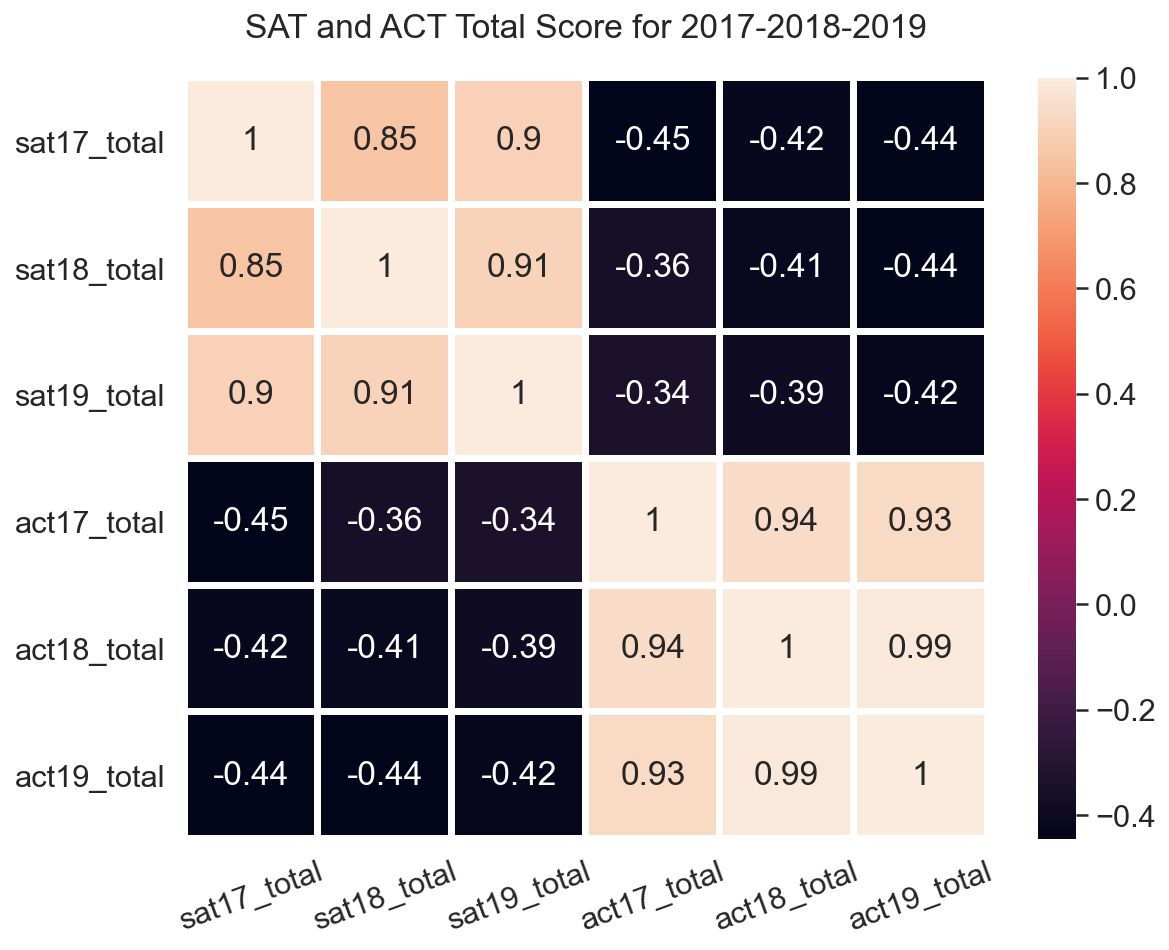

In [137]:
## Plot Heatmap-1 (total SAT & ACT)

sns.set(font_scale=1.4)
plt.figure(figsize=(9,7))
sns.heatmap(sat_total_corr,annot=True, linecolor='white',linewidths=3, cmap="rocket")
plt.xticks(rotation=20)
plt.title("SAT and ACT Total Score for 2017-2018-2019",pad=20);


__Heatmap-1 for Total score for each year:__


+ Strong positive correlation is seen between all SAT scores for different years, and even better correlation among ACT scores for different years.
+ While SAT and ACT scores have clear negative correlation, but not strong.




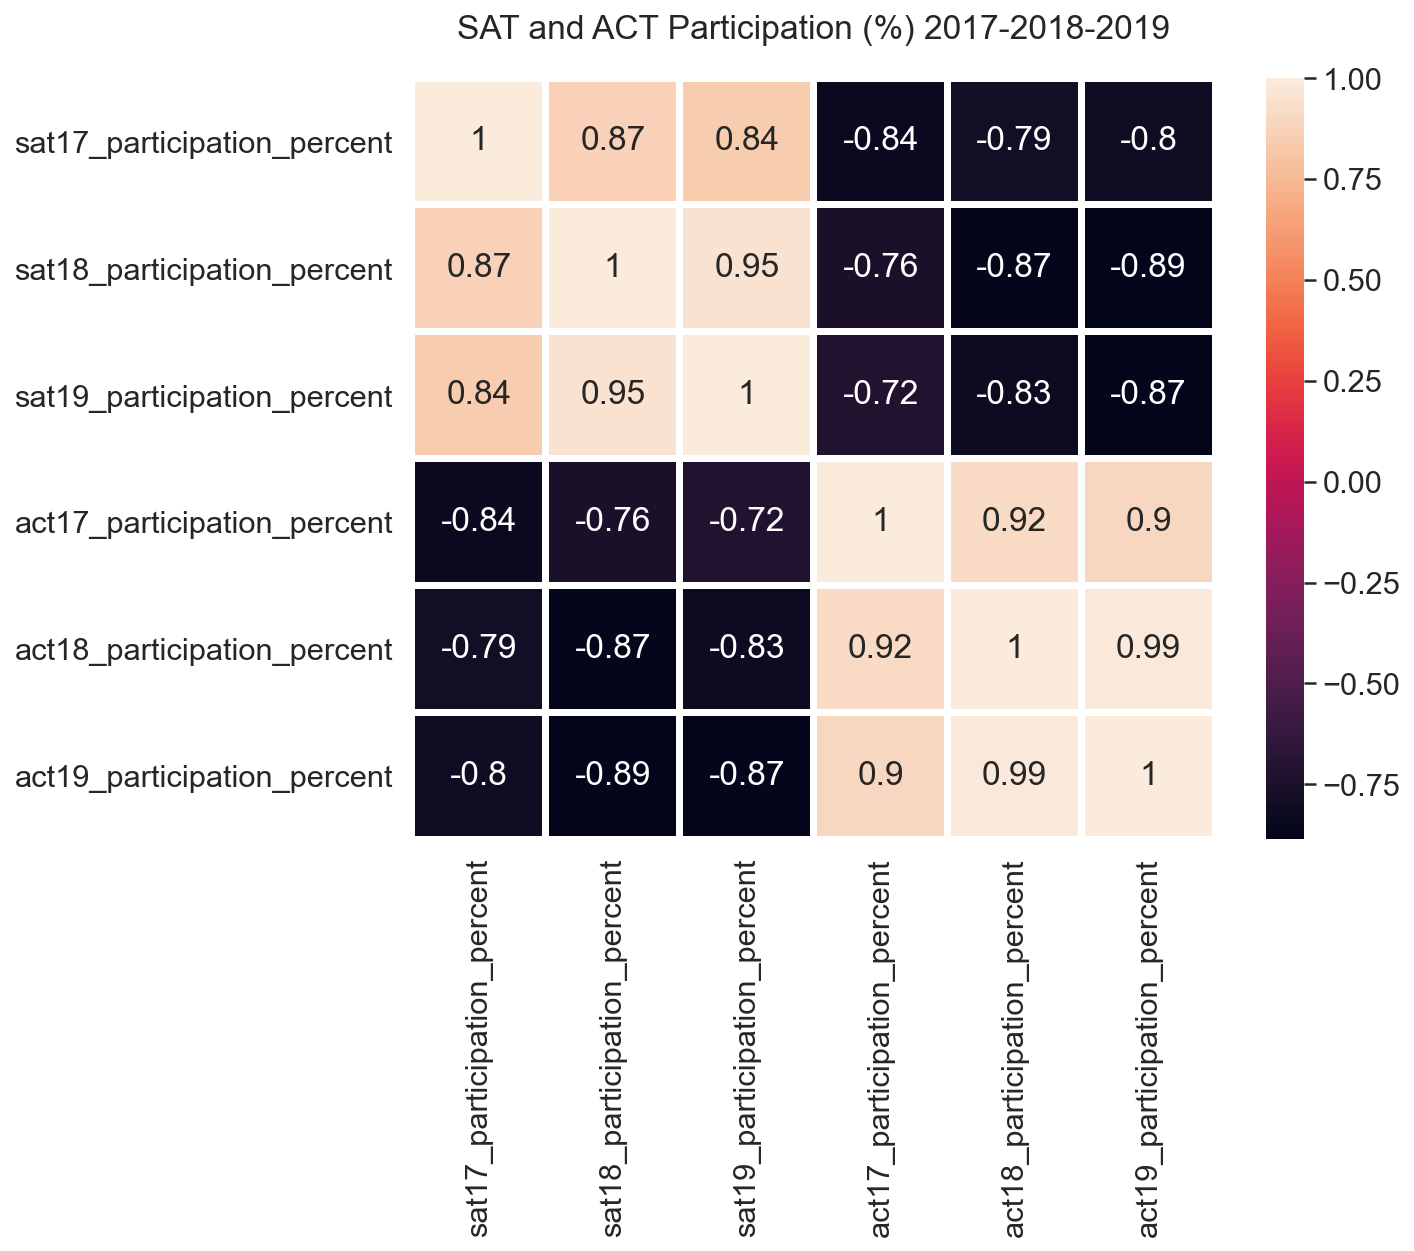

In [138]:
## Plot Heatmap-2 (Participation SAT & ACT)

sns.set(font_scale=1.4)
plt.figure(figsize=(9,7))
sns.heatmap(sat_participation_corr,annot=True, linecolor='white',linewidths=3, cmap="rocket")
plt.title("SAT and ACT Participation (%) 2017-2018-2019",pad=20);

__Heatmap-2 for Participation % for each year:__
+ Very Strong negative Correlation between SAT and ACT participation rates - this tells us that different states prefer different testing systems.



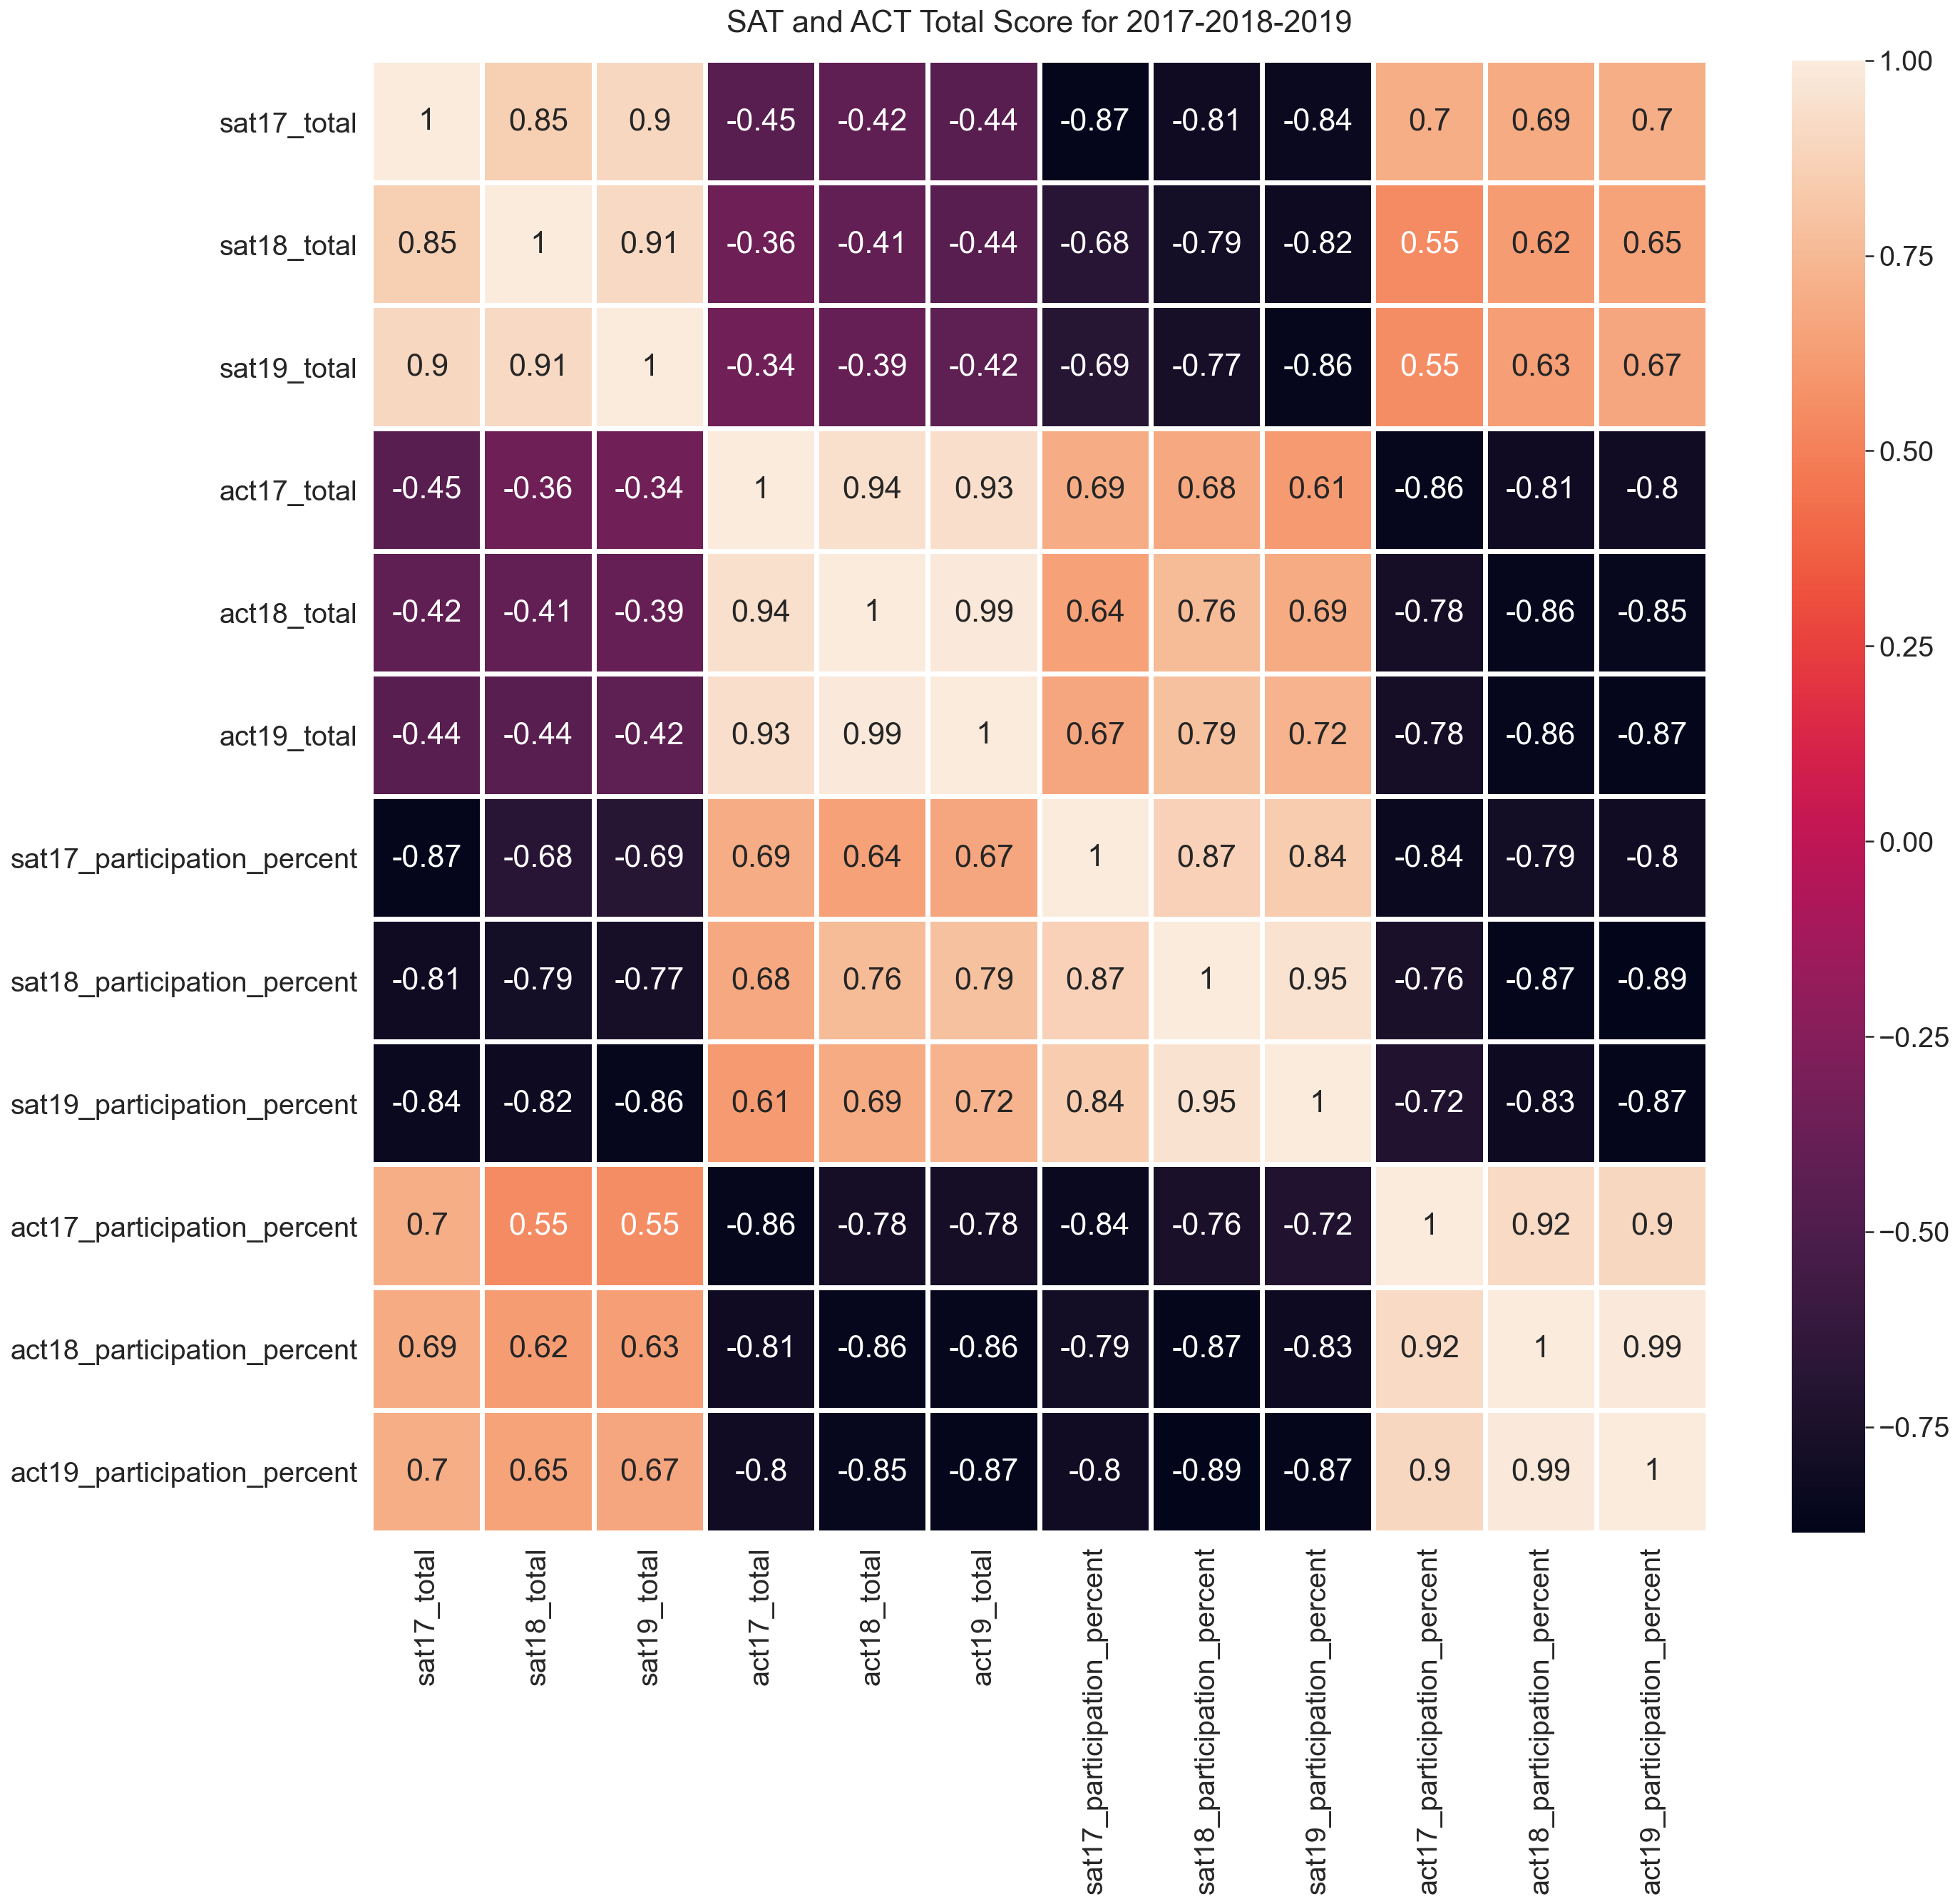

In [139]:
## Plot Heatmap-3 (total and Participation for all years and both tests)

sns.set(font_scale=1.8)
plt.figure(figsize=(21,19))
sns.heatmap(sat_both_total_participation_corr,annot=True, linecolor='white',linewidths=3, cmap="rocket")
plt.title("SAT and ACT Total Score for 2017-2018-2019",pad=20);

**HEATMAP-3 Total+Participation combined EXPLAINATION**

+ Strong negative correlation between participation and total - this confirms smaller participation leads to higher total and viceversa
 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [140]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        plt.tight_layout()
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [141]:
## Function parameter list

xlabels_participation = ['','participation_%',''] * 2
ylabels_participation = ['Frequency','',''] * 2
title_participation = ['2017_SAT_Participation%','2018_SAT_Participation%','2019_SAT_Participation%','2017_ACT_Participation%','2018_ACT_Participation%','2019_ACT_Participation%']

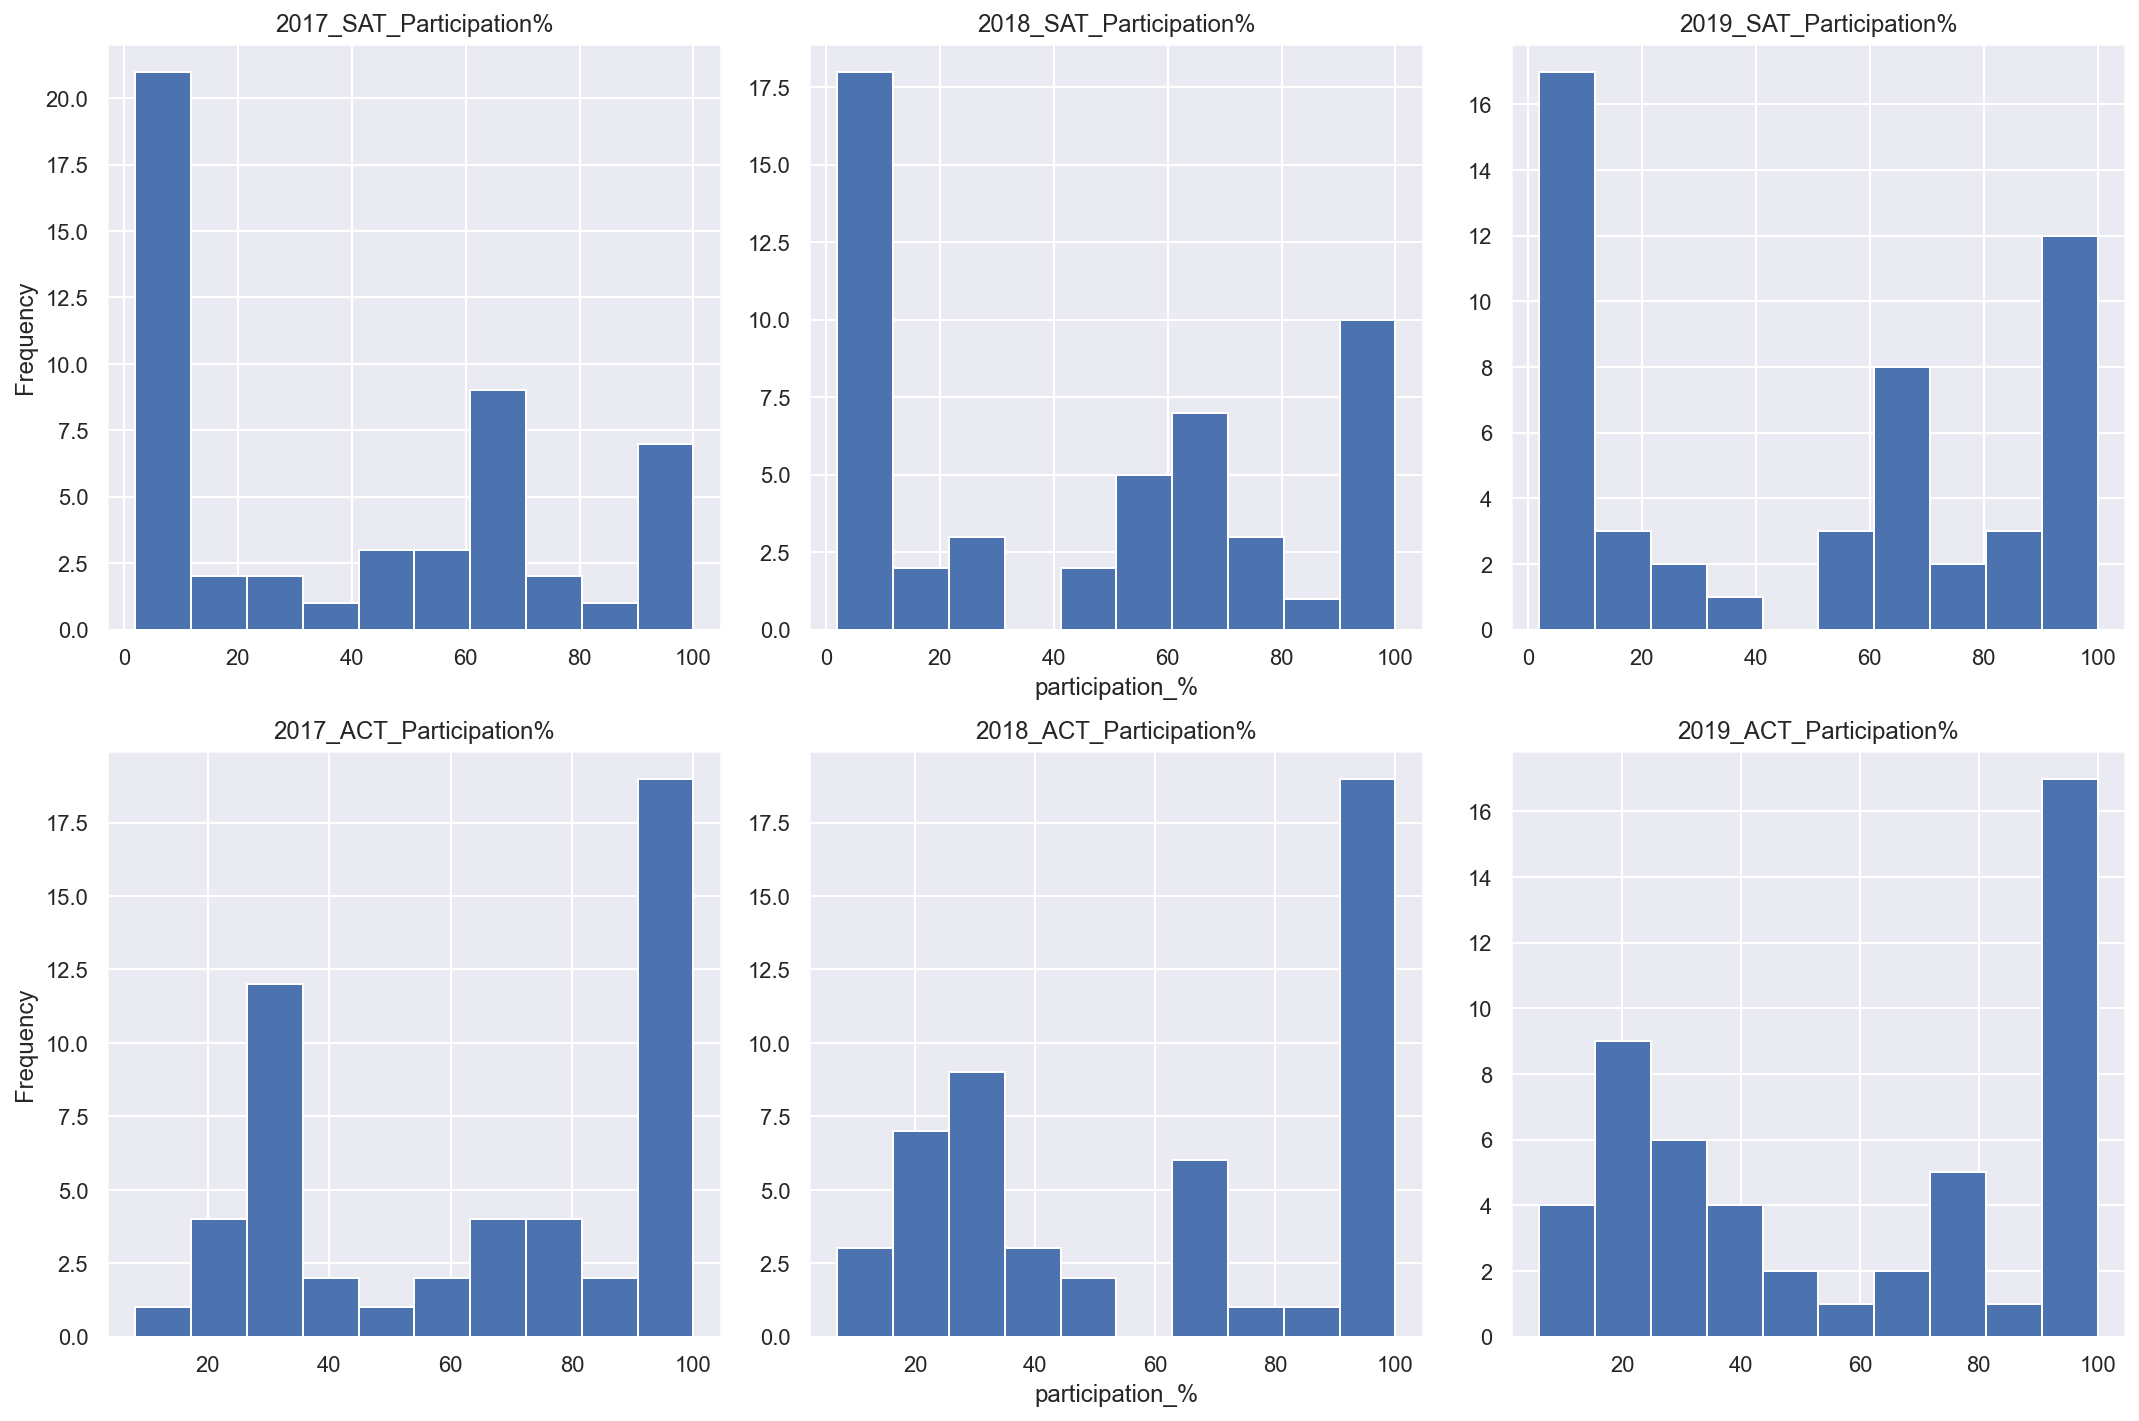

In [142]:
## print subplots using custom function

subplot_histograms(final_17_18_19_sat_act,select_participation,title_participation,xlabels_participation,ylabels_participation)

In [143]:
## Test1 if the histograms printed correctly

len(sat2017[sat2017['participation_percentage_sat17']<=20])

23

In [144]:
## Test2 if the histograms printed correctly
len(act2018[(act2018['participation_percentage_act18'] > 50) & (act2018['participation_percentage_act18'] <60)])

1

**PLOT#1 Participation rates for SAT & ACT**

1. For SAT Participation, more that 50% of the states have either very high or extremenly very low participation
2. Negative correlation between SAT and ACT participation can be confirmed using this plot. States with 0-10% participation for SAT's and 90-100% participation for ACT's.
3. High's and Low's for SAT's and ACT's clearly do not match. (Top 3 versus Bottom 3 plots)

In [145]:
math_sat_2017_mask = sat_act_2017[sat_act_2017['math_sat17']>200]['math_sat17']

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


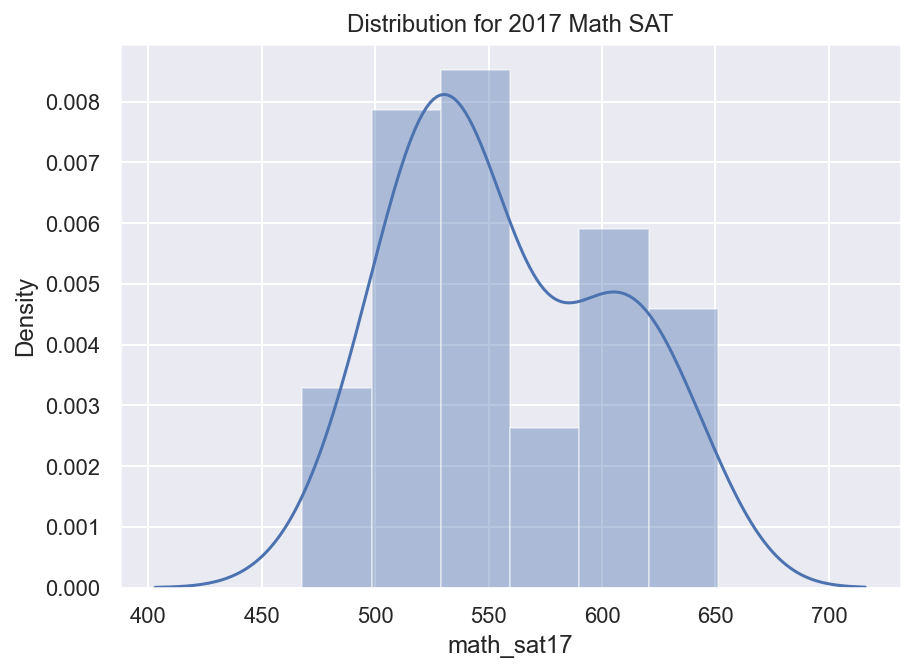

In [146]:
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.distplot(math_sat_2017_mask,bins=6)
plt.title('Distribution for 2017 Math SAT');

In [147]:
sat_act_2017['math_sat17'].mean()

547.6274509803922

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


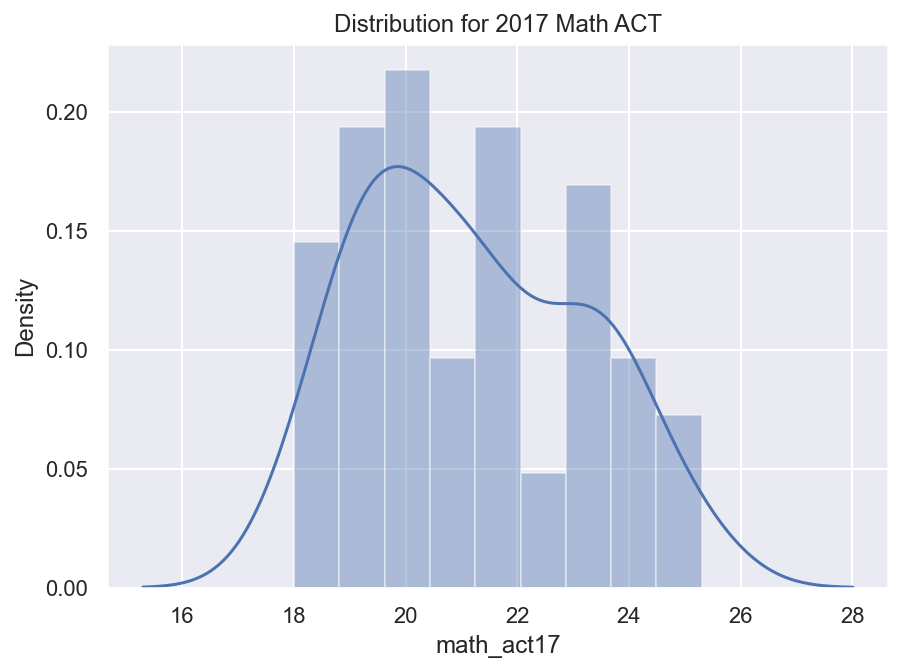

In [148]:
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.distplot(sat_act_2017['math_act17'],bins=9)
plt.title('Distribution for 2017 Math ACT');

**PLOT#2 Math Scores for SAT & ACT**

+ SAT - Mean and Median fall almost at the same point, we can say that the scores are normally distributed (Mean=Median=548)
+ ACT - Similar to the plot for SAT scores, ACT scores are also normally distributed (mean=median=21)

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


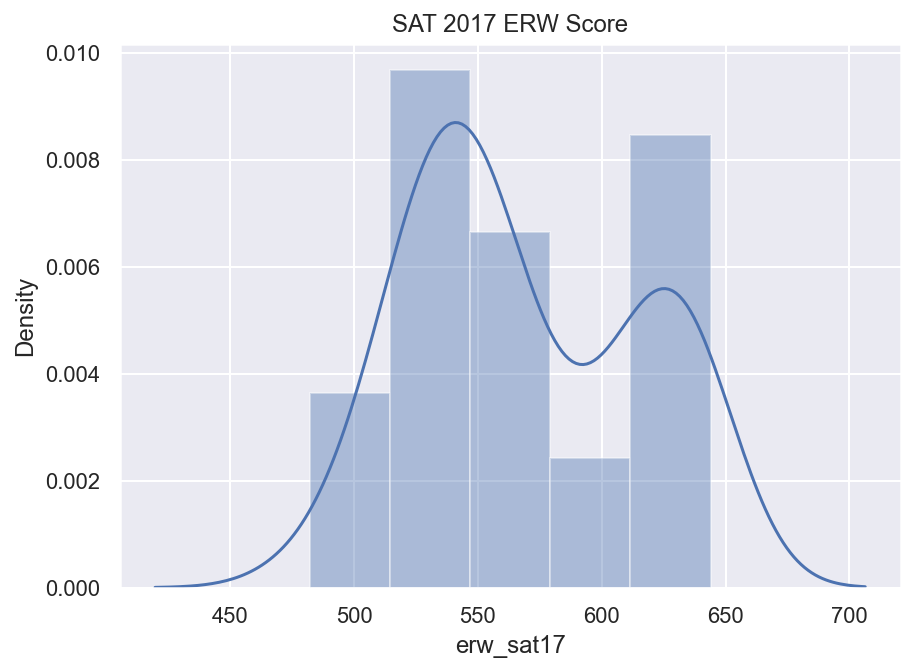

In [149]:
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.distplot(sat_act_2017['erw_sat17'],bins=5)
plt.title('SAT 2017 ERW Score');

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


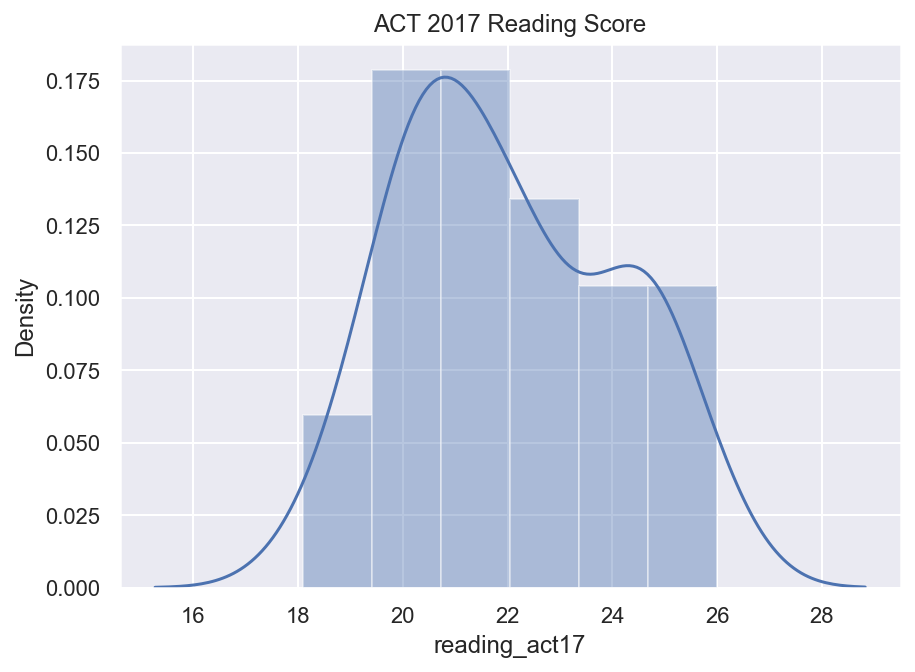

In [150]:
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.distplot(sat_act_2017['reading_act17'],bins=6)
plt.title('ACT 2017 Reading Score');

In [151]:
## Test - Mean

sat_act_2017['reading_act17'].mean()

22.013725490196077

**PLOT#3 Reading/verbal Scores for SAT & ACT**

+ SAT - for ERW Score, Mean > Median, Therefore we can say the distribution is positively skewed. (almost 2 modes)
+ ACT - The scores are normally distributed (Mean=Median=22)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [152]:
temp_sat_act_2017 = sat_act_2017.copy()

In [153]:
## Creating a mask to use in plots further down the line

temp_sat_act_2017['math_sat17'] = temp_sat_act_2017[temp_sat_act_2017['math_sat17']>200]['math_sat17']

In [154]:
interested_pairs = temp_sat_act_2017.loc[:,['states','math_sat17','math_act17','erw_sat17','reading_act17','total_sat17','composite_act17']]

<Figure size 720x720 with 0 Axes>

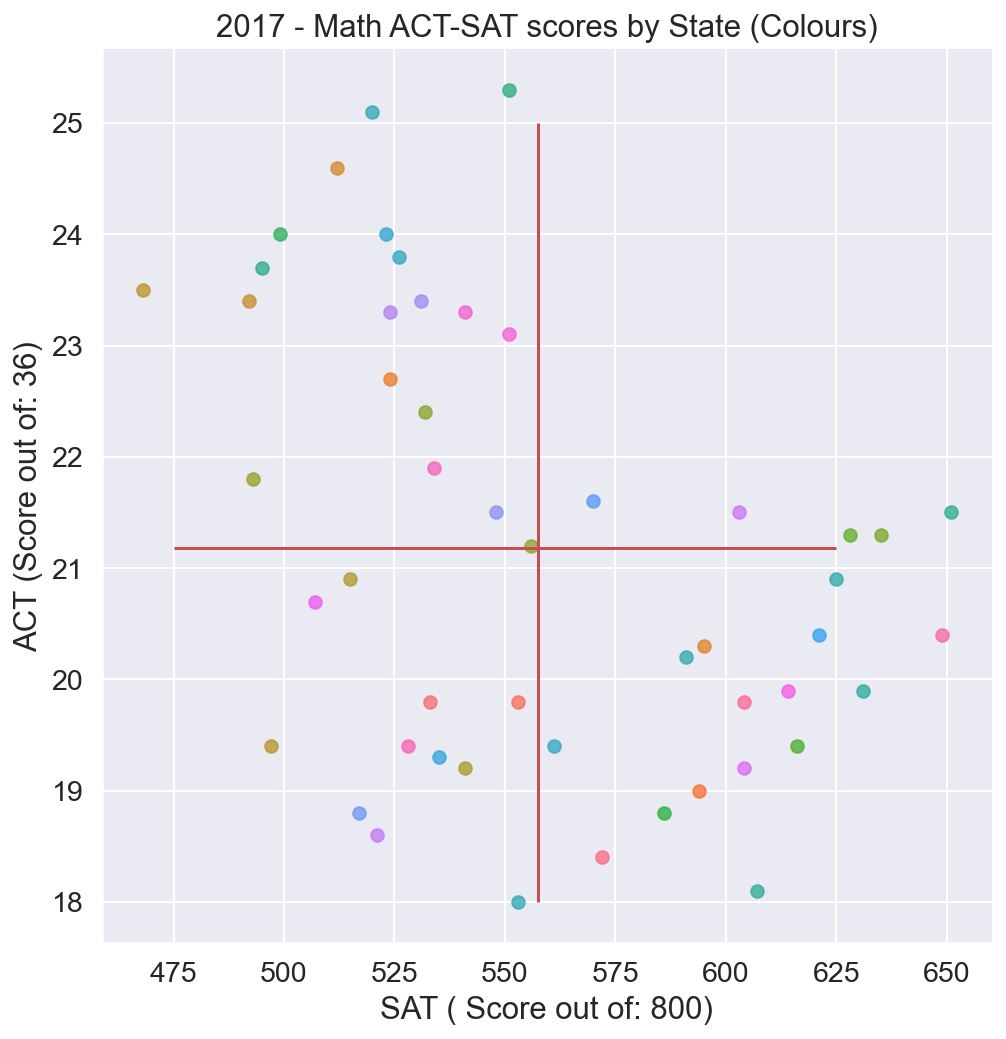

In [155]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,10))
sns.lmplot(x='math_sat17',y='math_act17',hue='states',data=interested_pairs,scatter_kws={'s':40},legend=False,height=7,)
plt.hlines(y = np.mean(interested_pairs['math_act17']),xmin=475,xmax=625, color='r')
plt.vlines(x = np.mean(interested_pairs['math_sat17']),ymin=18,ymax=25, color='r')
plt.xlabel('SAT ( Score out of: 800)')
plt.ylabel('ACT (Score out of: 36)')
plt.title('2017 - Math ACT-SAT scores by State (Colours)');

## Legend not used purposely to avoid any confusions

In [156]:
## 51 different colour dots representing each state

len(interested_pairs['states'])

51

**Scatterplot for Plot# 1 (Math Scores SAT vs ACT, 2017)**

+ Removed the outlier for 'math_sat17' column.
+ Little negative collinearity, but no clear relationship among data
+ I can see 3 groups of scorers,<br>
    o 1. states with very high average ACT_Math score and very low average SAT_Math scores<br>
    o 2. states with very low average ACT_Math score and very high average SAT_Math scores<br>
    o 3. states with average scores for both the tests <br>
    o This kind of backsup our assumption, probably the scores are directly related to states participation.

<Figure size 720x720 with 0 Axes>

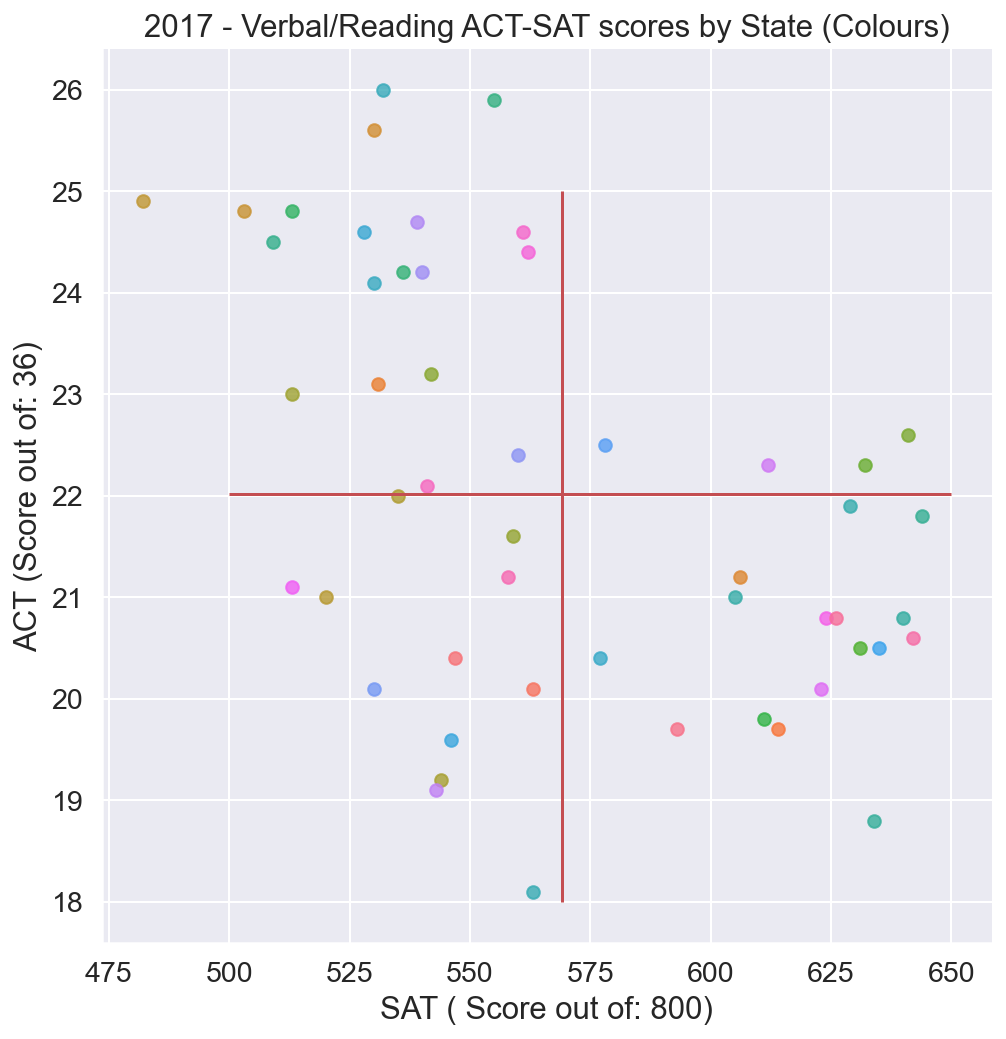

In [157]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,10))
sns.lmplot(x='erw_sat17',y='reading_act17',hue='states',data=interested_pairs,scatter_kws={'s':40},legend=False,height=7)
plt.hlines(y = np.mean(interested_pairs['reading_act17']),xmin=500,xmax=650, color='r')
plt.vlines(x = np.mean(interested_pairs['erw_sat17']),ymin=18,ymax=25, color='r')
plt.xlabel('SAT ( Score out of: 800)')
plt.ylabel('ACT (Score out of: 36)')
plt.title('2017 - Verbal/Reading ACT-SAT scores by State (Colours)');

**Scatterplot for Plot# 2 (Verbal/Reading Scores SAT vs ACT, 2017)**

+ Similar to Math scores, little negative collinearity, but no clear relationship among data
+ I can see 3 groups of scorers,<br>
    o 1. states with very high average ACT_reading score and very low average SAT_erw scores<br>
    o 2. states with very low average ACT_reading score and very high average SAT_erw scores<br>
    o 3. states with average scores for both the tests<br>
    o This kind of backsup our assumption, probably the scores are directly related to states participation.

<Figure size 720x720 with 0 Axes>

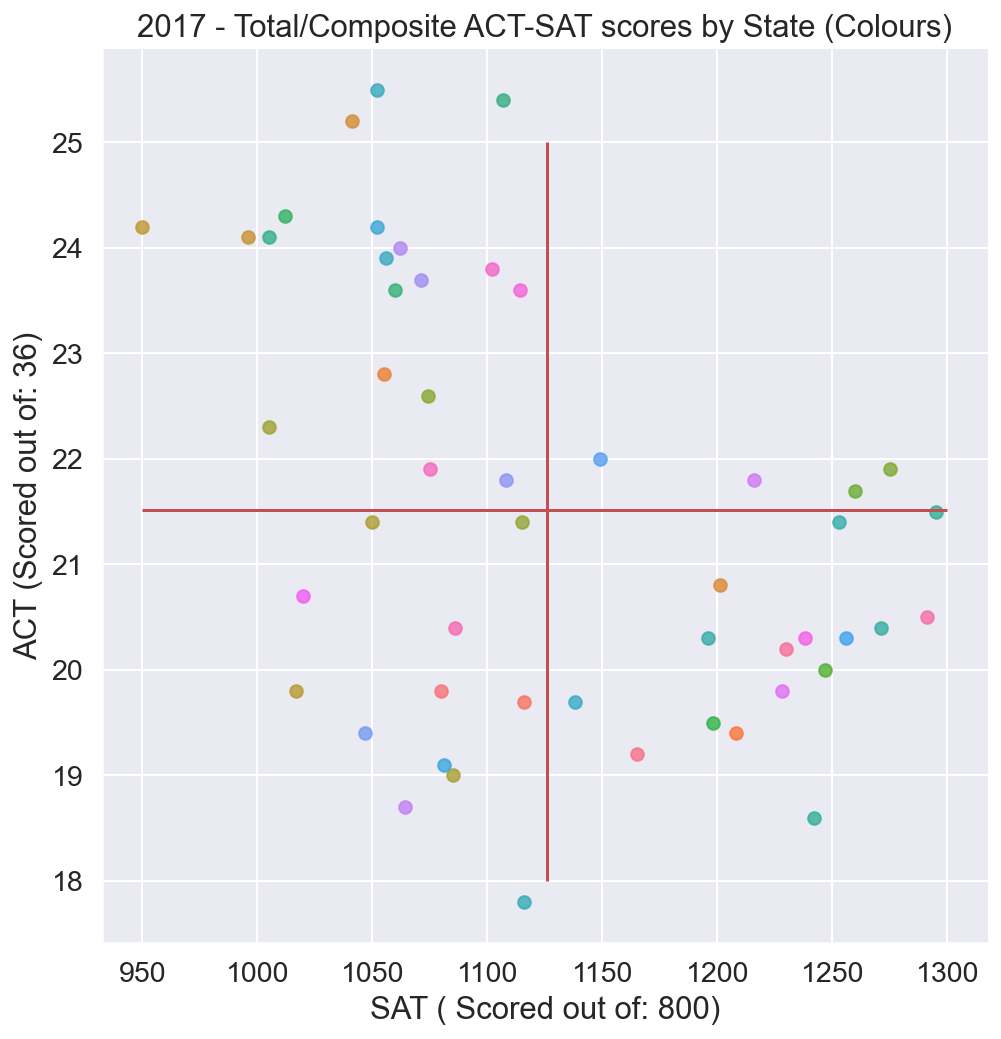

In [158]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,10))
sns.lmplot(x='total_sat17',y='composite_act17',hue='states',data=interested_pairs,scatter_kws={'s':40},legend=False,height=7)
plt.hlines(y = np.mean(interested_pairs['composite_act17']),xmin=950,xmax=1300, color='r')
plt.vlines(x = np.mean(interested_pairs['total_sat17']),ymin=18,ymax=25, color='r')
plt.xlabel('SAT ( Scored out of: 800)')
plt.ylabel('ACT (Scored out of: 36)')
plt.title('2017 - Total/Composite ACT-SAT scores by State (Colours)');

**Scatterplot for Plot# 3 (Total/Composite Scores SAT vs ACT, 2017)**

+ Similar to Math/Reading scores, little negative collinearity, but no clear relationship among data
+ I can see 3 groups of scorers,<br>
    o 1. states with very high average ACT_Composite score and very low average SAT_Total scores<br>
    o 2. states with very low average ACT_Composite score and very high average SAT_Total scores<br>
    o 3. states with average scores for both the tests<br>
    o This kind of backsup our assumption, probably the scores are directly related to states participation.

In [159]:
## select_total,select_participation,select_total_particioation - masks from Heatmap section being reused

total_scores = clean_sat_act_2017_18_19[select_total]
total_participation = clean_sat_act_2017_18_19[select_participation]
total_participation = clean_sat_act_2017_18_19[select_total_participation]

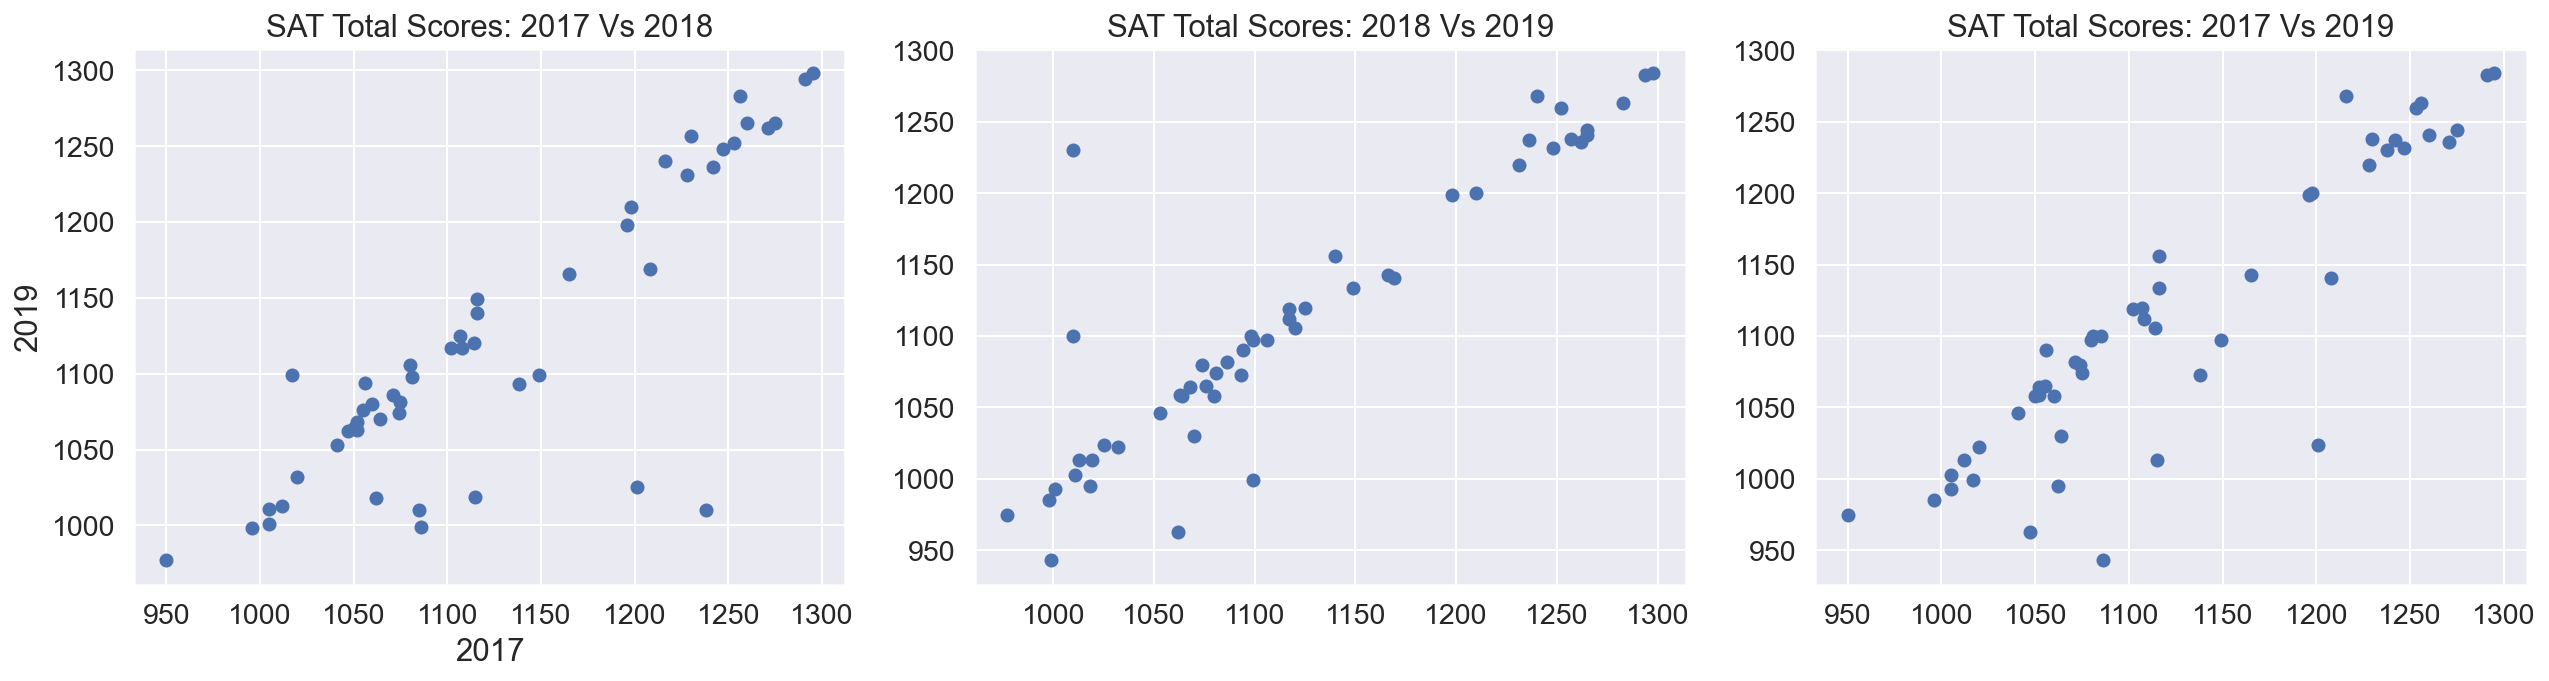

In [160]:
sns.set(font_scale=1.3)
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
axes[0].scatter(total_scores['sat17_total'],total_scores['sat18_total'])
axes[0].set_title('SAT Total Scores: 2017 Vs 2018')
axes[0].set_xlabel('2017')
axes[0].set_ylabel('2018')

axes[1].scatter(total_scores['sat18_total'],total_scores['sat19_total'])
axes[1].set_title('SAT Total Scores: 2018 Vs 2019')
axes[0].set_xlabel('2018')
axes[0].set_ylabel('2019')

axes[2].scatter(total_scores['sat17_total'],total_scores['sat19_total'])
axes[2].set_title('SAT Total Scores: 2017 Vs 2019');
axes[0].set_xlabel('2017')
axes[0].set_ylabel('2019')

plt.tight_layout();

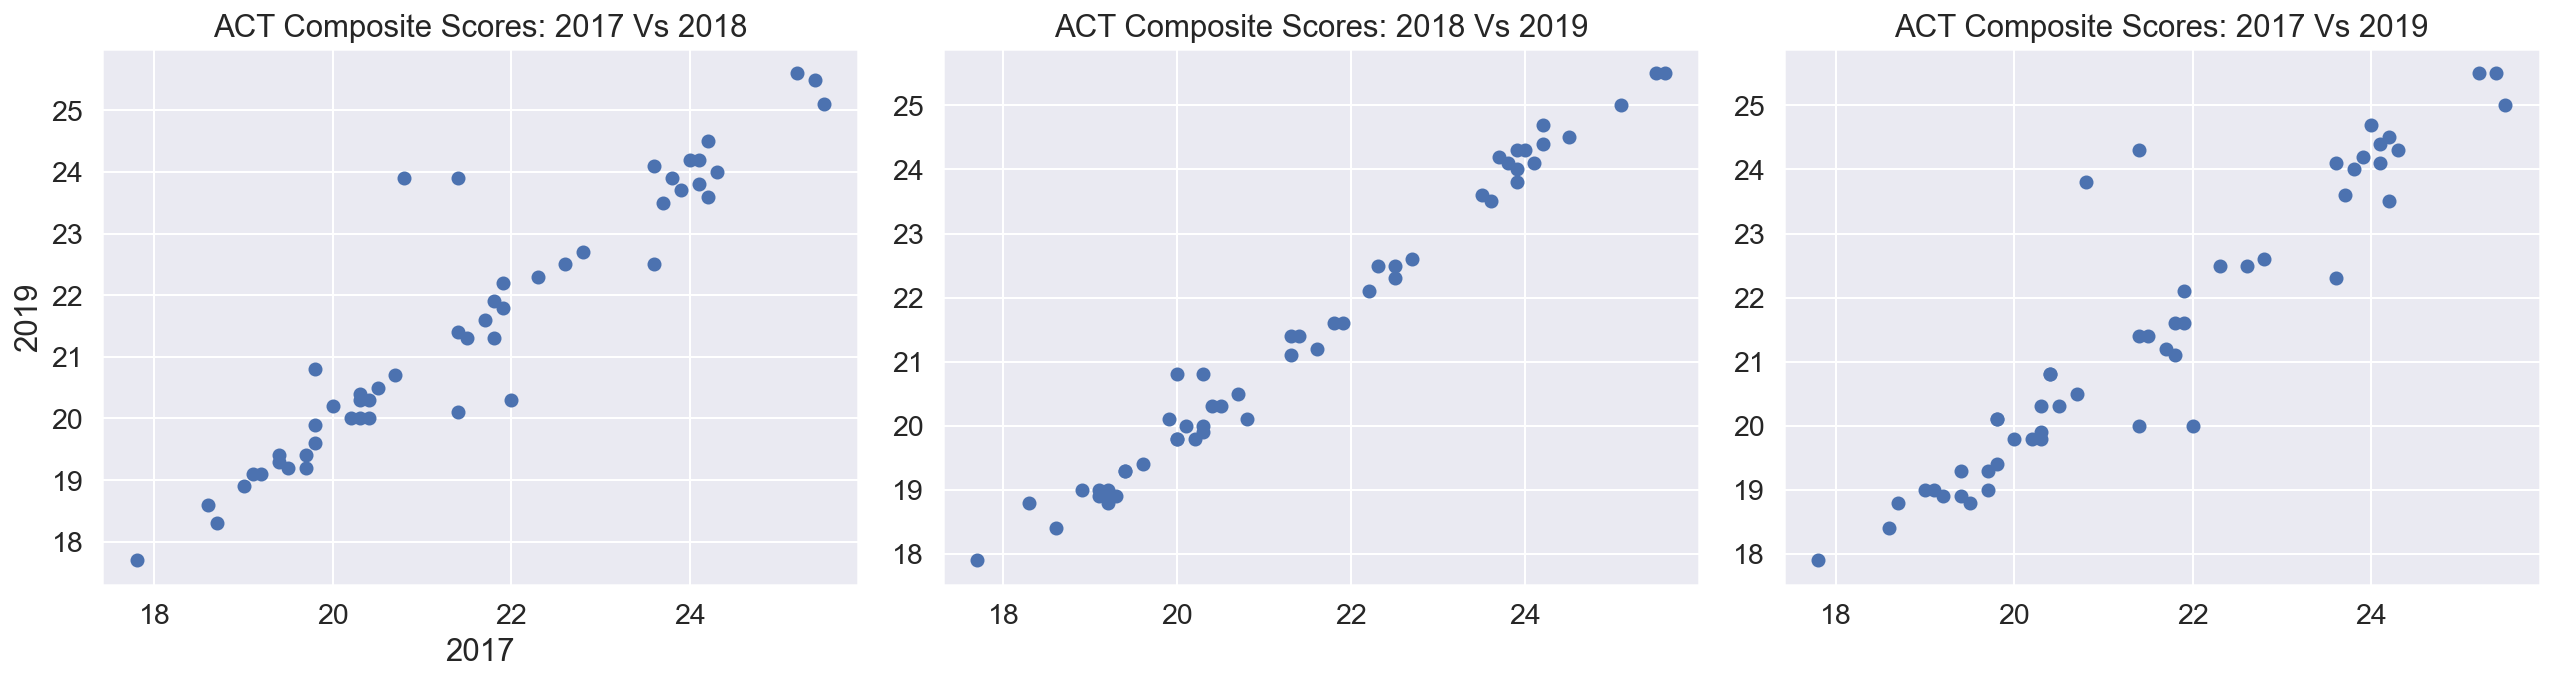

In [161]:
### ACT Composite 2017-2018-2019 Correlation using Scatterplot

sns.set(font_scale=1.3)
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
axes[0].scatter(total_scores['act17_total'],total_scores['act18_total'])
axes[0].set_title('ACT Composite Scores: 2017 Vs 2018')
axes[0].set_xlabel('2017')
axes[0].set_ylabel('2018')

axes[1].scatter(total_scores['act18_total'],total_scores['act19_total'])
axes[1].set_title('ACT Composite Scores: 2018 Vs 2019')
axes[0].set_xlabel('2018')
axes[0].set_ylabel('2019')

axes[2].scatter(total_scores['act17_total'],total_scores['act19_total'])
axes[2].set_title('ACT Composite Scores: 2017 Vs 2019');
axes[0].set_xlabel('2017')
axes[0].set_ylabel('2019')

plt.tight_layout();

In [162]:
## Test - SAT vs ACT Participation Tests

sns.set(font_scale=1.3)
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5), dpi=600)
axes[0].scatter(total_participation['sat17_participation_percent'],total_participation['act17_participation_percent'])
axes[0].set_title('SAT vs ACT Participation: 2017')
axes[0].set_xlabel('SAT')
axes[0].set_ylabel('ACT')

axes[1].scatter(total_participation['sat18_participation_percent'],total_participation['act18_participation_percent'])
axes[1].set_title('SAT vs ACT Participation: 2018')
axes[0].set_xlabel('SAT')
axes[0].set_ylabel('ACT')

axes[2].scatter(total_participation['sat19_participation_percent'],total_participation['act19_participation_percent'])
axes[2].set_title('SAT vs ACT Participation: 2018');
axes[0].set_xlabel('SAT')
axes[0].set_ylabel('ACT')

plt.tight_layout();

In [163]:
 ##Test -- Supports our plot that all 
    
total_scores.corr() 

sat17_total  sat18_total  sat19_total  act17_total  act18_total  \
sat17_total     1.000000     0.852727     0.900690    -0.445020    -0.421317   
sat18_total     0.852727     1.000000     0.905423    -0.357463    -0.412421   
sat19_total     0.900690     0.905423     1.000000    -0.341370    -0.390046   
act17_total    -0.445020    -0.357463    -0.341370     1.000000     0.941365   
act18_total    -0.421317    -0.412421    -0.390046     0.941365     1.000000   
act19_total    -0.444732    -0.444598    -0.424782     0.934117     0.991787   

             act19_total  
sat17_total    -0.444732  
sat18_total    -0.444598  
sat19_total    -0.424782  
act17_total     0.934117  
act18_total     0.991787  
act19_total     1.000000

**Scatterplot for Plot# 4** (Includes Total Comparisons between, Total scores in SAT, Composite Scores in ACT and SAT/ACT Participation

 + SAT Total Scores: 2017 vs 2018 vs 2019 - strong positive correlation, tells us that the states are consistent with the SAT scores
 + ACT Composite Scores: 2017 vs 2018 vs 2019 - strong positive correlation, tells us that the states are consistent with the ACT scores
 + SAT Vs ACT Participation: 2017 vs 2018 vs 2019 - clear negative correlation, tells us that the states with higher SAT participation have lower ACT participation rate and viceversa. Not many states participate in both the test. States include Florida, Georgia, Huwaii, North Carolina and South Carolina

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [164]:
## Grab all similar columns into 1 dataframe for all 3 years

erw_sat_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,1:4]
math_sat_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,4:7]
total_sat_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,7:10]
part_sat_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,10:13]
total_act_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,13:16]
part_act_17_18_19_scores = clean_sat_act_2017_18_19.iloc[:,16:]

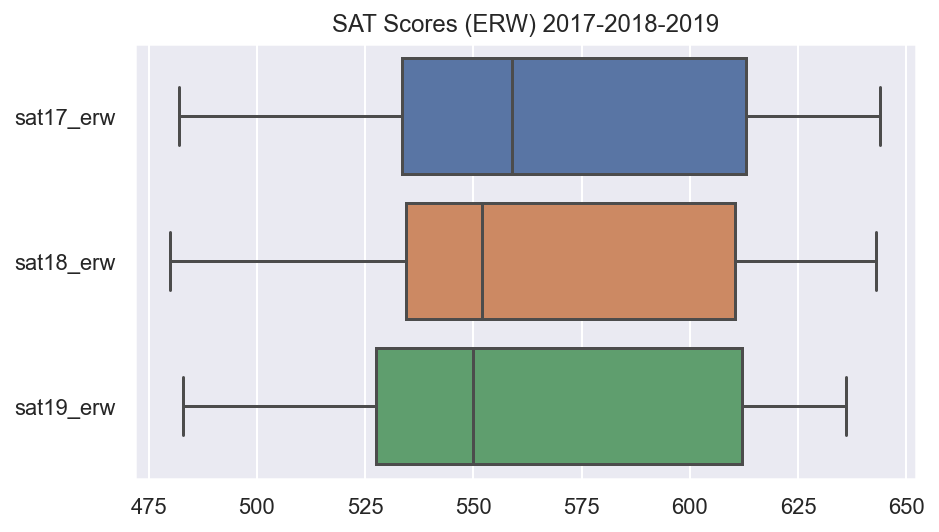

In [165]:
## Box Plot 1 - ERW (SAT) 2017-2018-2019 - Comparative

sns.set(font_scale=1)
fig = plt.figure(figsize=(7,4))
sns.boxplot(data = erw_sat_17_18_19_scores, orient='h')
plt.title('SAT Scores (ERW) 2017-2018-2019');

In [166]:
erw_sat_17_18_19_scores.mean().mean()

564.5359477124183

 **Box Plot# 1 (SAT-ERW)**
 + Consistent scores across all 3 years, no outliers in the dataset
 + Maintains average grades across US Avg. Median ~ 553 while Avg. Mean Score ~ 5640

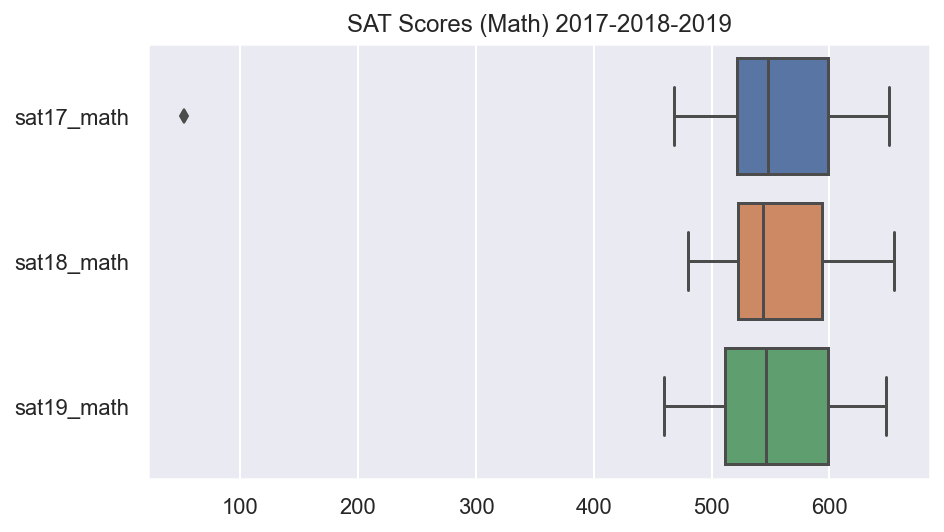

In [167]:
## Box Plot 2 - Math (SAT) 2017-2018-2019 - Comparative

sns.set(font_scale=1)
fig = plt.figure(figsize=(7,4))
sns.boxplot(data = math_sat_17_18_19_scores, orient='h')
plt.title('SAT Scores (Math) 2017-2018-2019');

In [168]:
math_sat_17_18_19_scores.median().mean()

546.0

 **Box Plot2 1 (SAT-Math)**
 + More than 75% of the states score well above average for this section of SAT
 + Maintains average grades across US Avg. Median ~ 546 while Avg. Mean Score ~ 552 (Right Skew)

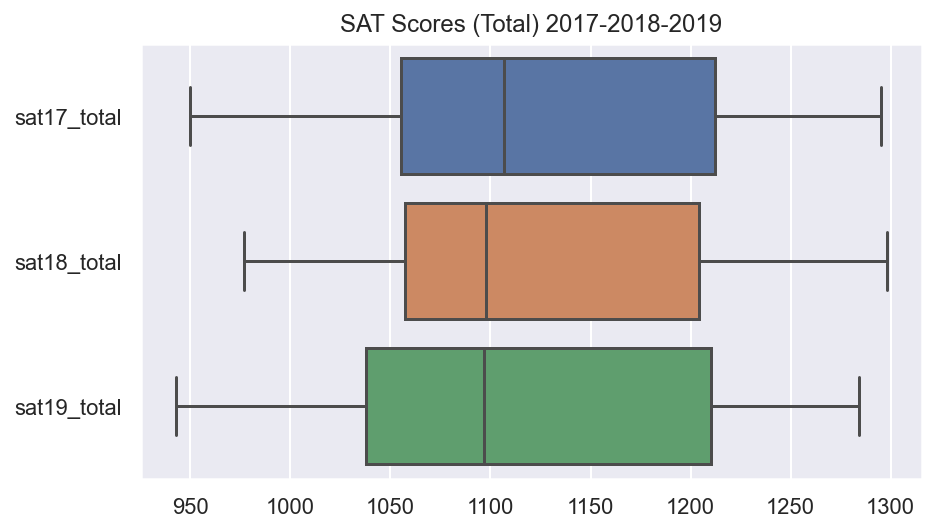

In [169]:
## Box Plot 3 - Total Score (SAT) 2017-2018-2019 - Comparative

sns.set(font_scale=1)
fig = plt.figure(figsize=(7,4))
sns.boxplot(data = total_sat_17_18_19_scores, orient='h')
plt.title('SAT Scores (Total) 2017-2018-2019');

In [170]:
total_sat_17_18_19_scores.median().mean()

1100.6666666666667

 **Box Plot# 3 (SAT-Total)**
 + Quiet big interquartile range, but almost 25% of the states score well above the average.
 + Maintains average grades across US Avg. Median ~ 1100 while Avg. Mean Score ~ 1120 (Right Skew)

## Participation Rate: Box Plots tells it all!

In [171]:
## Participation for SAT & ACT is all Percentage between 0-100 so we can combine and plot them together for comaprison
participation_per_comb = pd.concat([part_sat_17_18_19_scores, part_act_17_18_19_scores],axis=1)

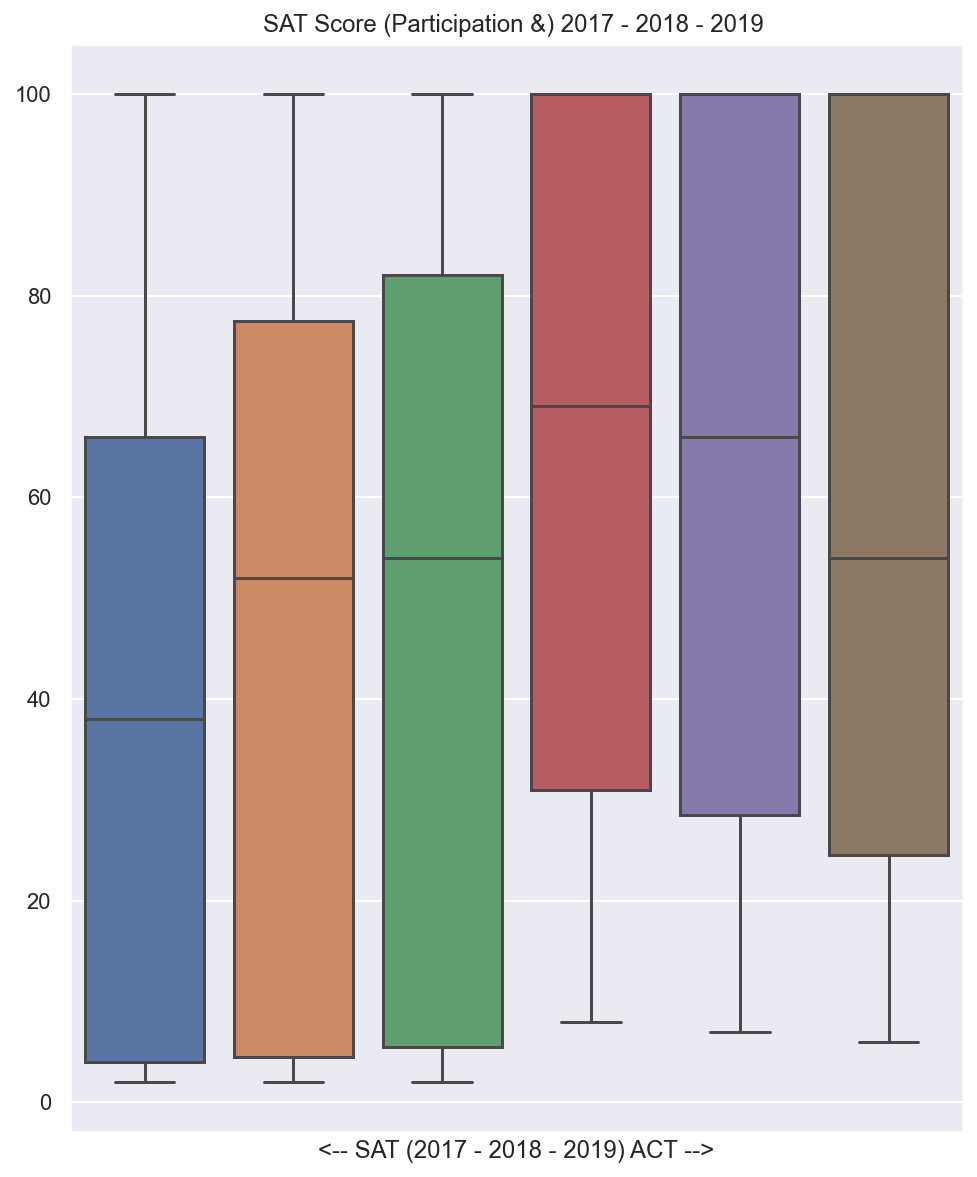

In [172]:
## Box Plot 4 - Participation %  (SAT) 2017-2018-2019 - Comparative
sns.set(font_scale=1)
fig = plt.figure(figsize=(8,10))
sns.boxplot(data = participation_per_comb)
plt.title("SAT Score (Participation &) 2017 - 2018 - 2019 ")
plt.xlabel('<-- SAT (2017 - 2018 - 2019) ACT -->')
plt.xticks([]);

In [173]:
## SAT participation more than 70% - # of states

len(part_sat_17_18_19_scores[(part_sat_17_18_19_scores['sat17_participation_percent'] > 70) |
                         (part_sat_17_18_19_scores['sat18_participation_percent'] > 70) |
                         (part_sat_17_18_19_scores['sat19_participation_percent'] > 70)])

17

In [174]:
## ACT participation less than 30% - # of states

len(part_act_17_18_19_scores[(part_act_17_18_19_scores['act17_participation_percent'] < 30) |
                         (part_act_17_18_19_scores['act18_participation_percent'] < 30) |
                         (part_act_17_18_19_scores['act19_participation_percent'] < 30)])

17

In [175]:
part_act_17_18_19_scores.mean().mean()

61.882352941176464

 **Box Plot# 4 (SAT & ACT -Participation%)**
 + Number of states with Avg. SAT participation > 70 is exactly same as states with Avg. ACT participation < 30
 + SAT - US Avg. Median ~ 48% while Avg. Mean Score ~ 44% (Left Skew)
 + ACT - US Avg. Median ~ 63% while Avg. Mean Score ~ 62% (Left Skew)
 + This tells us on Avg. atleast 60% of States participate in ACT while less than 50% of the States participate in SAT
 + Lastly, both of them show a consistently increasing participation rate

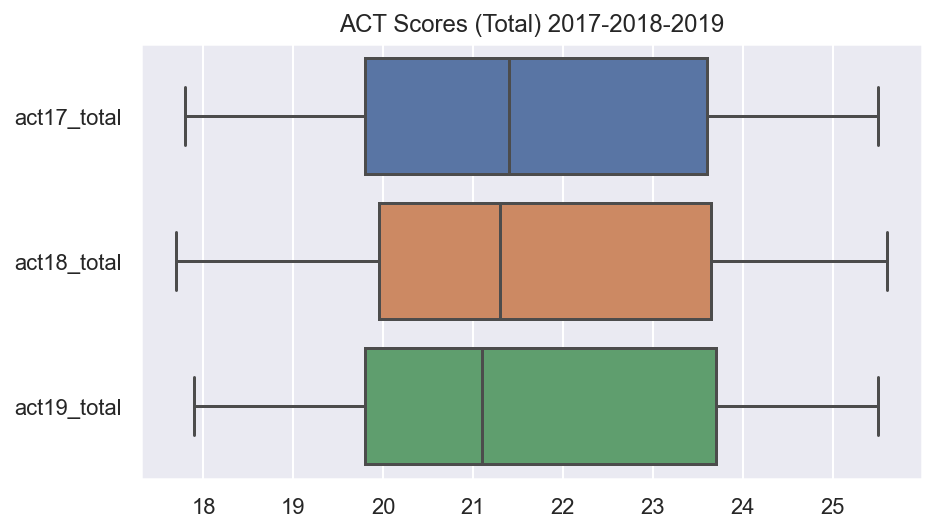

In [176]:
## Box Plot 5 - Composite Score (ACT) 2017-2018-2019 - Comparative

sns.set(font_scale=1)
fig = plt.figure(figsize=(7,4))
sns.boxplot(data = total_act_17_18_19_scores, orient='h')
plt.title('ACT Scores (Total) 2017-2018-2019');

<AxesSubplot:xlabel='act19_total', ylabel='Count'>

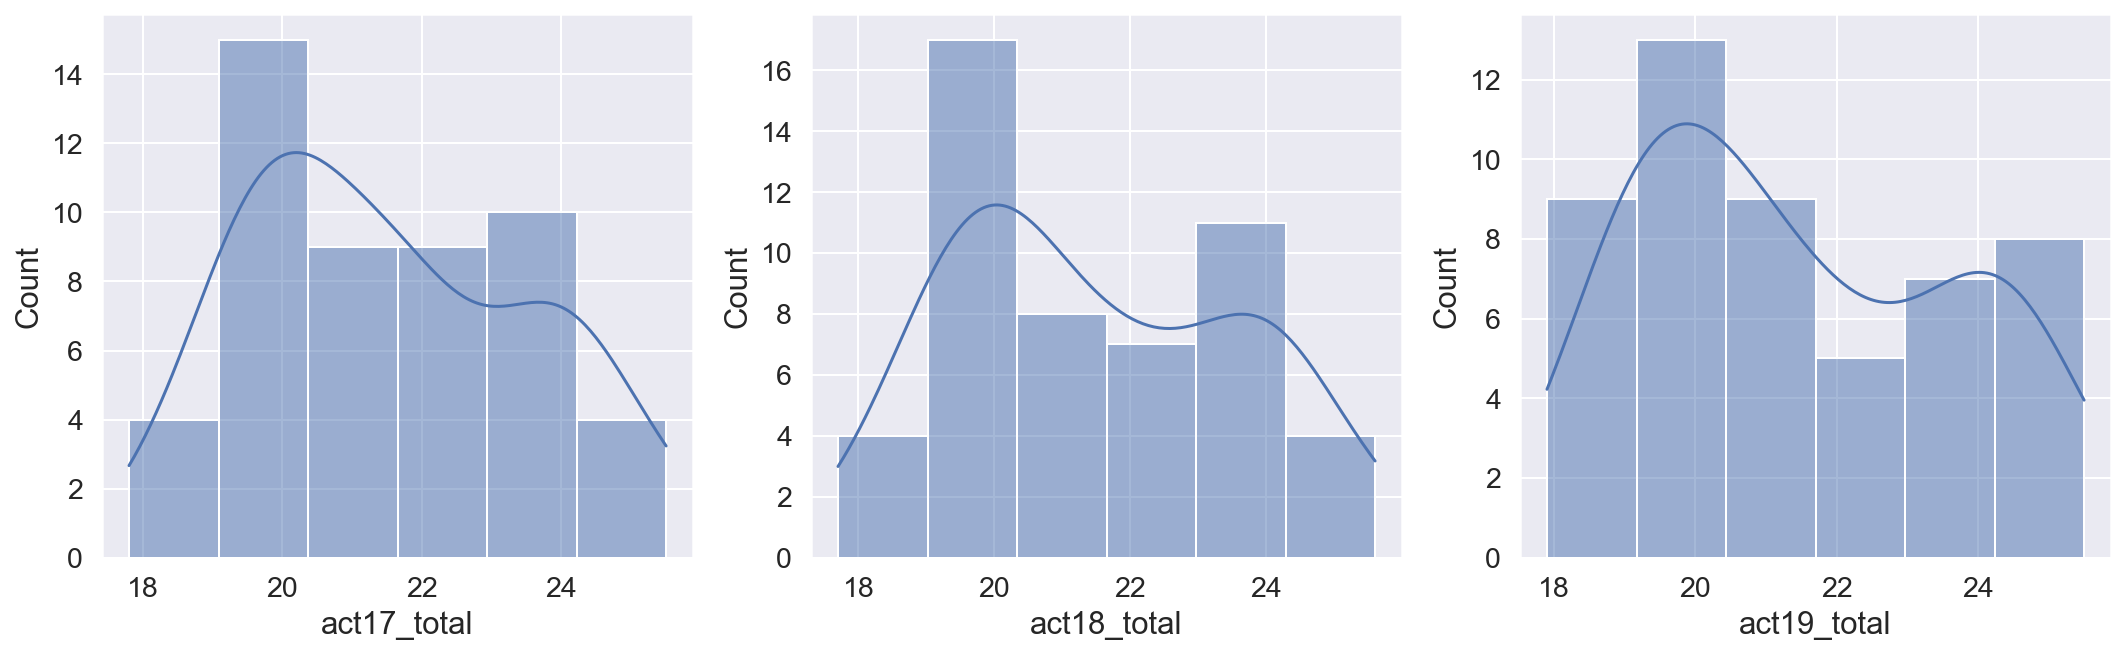

In [177]:
## Distribution

sns.set(font_scale=1.3)
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
sns.histplot(ax=axes[0],data= total_act_17_18_19_scores.iloc[:,0], bins=6, kde=True)
sns.histplot(ax=axes[1],data= total_act_17_18_19_scores.iloc[:,1], bins=6, kde=True)
sns.histplot(ax=axes[2],data= total_act_17_18_19_scores.iloc[:,2], bins=6, kde=True)

In [178]:
total_act_17_18_19_scores.iloc[:,2].median()

21.1

 **Box Plot# 5 (ACT-Total)**
 + Quiet big interquartile range, but almost 25% of the states score well above the average.
 + ACT Total: 2017 (Mean ~ Median ~ 21.5), 2018 (Mean ~ Median ~ 21.3) and 2019 (Mean ~ 21.4, Median ~ 21.1)
 + we can say that over the 3 year period Median dropped a bit, while Mean remaind steady.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [179]:
## We did not explore the colliearity between ERW and Math scores,

final_17_18_19_sat_act.iloc[:,:6].corr()

sat17_erw  sat18_erw  sat19_erw  sat17_math  sat18_math  \
sat17_erw    1.000000   0.814096   0.898352    0.628405    0.865909   
sat18_erw    0.814096   1.000000   0.865572    0.487915    0.954661   
sat19_erw    0.898352   0.865572   1.000000    0.562127    0.940199   
sat17_math   0.628405   0.487915   0.562127    1.000000    0.537222   
sat18_math   0.865909   0.954661   0.940199    0.537222    1.000000   
sat19_math   0.876606   0.831921   0.986026    0.564127    0.933717   

            sat19_math  
sat17_erw     0.876606  
sat18_erw     0.831921  
sat19_erw     0.986026  
sat17_math    0.564127  
sat18_math    0.933717  
sat19_math    1.000000

<AxesSubplot:>

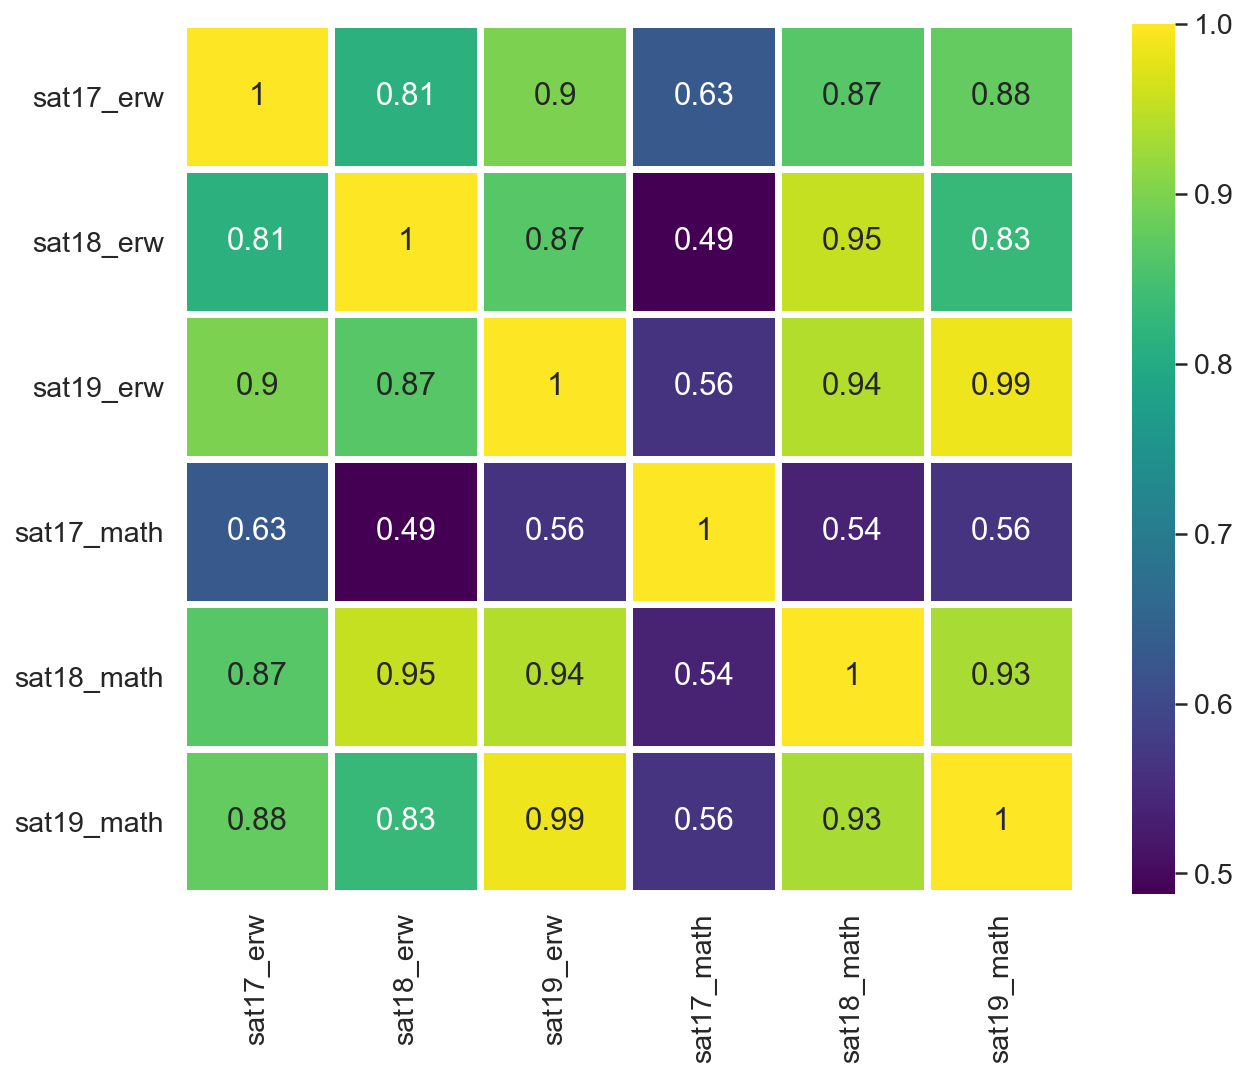

In [180]:
plt.figure(figsize=(10,8))
sns.heatmap(final_17_18_19_sat_act.iloc[:,:6].corr(), cmap='viridis', annot=True,linecolor='white', linewidths=3)

**Interpretation**
+ Math and ERW possess a very strong correlation for SAT's. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

### Top 3 States based on Participation Rates for SAT/ACT across all 3 years

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [181]:
colorado_all = final_17_18_19_sat_act.loc[['Colorado'],:]
illinois_all = final_17_18_19_sat_act.loc[['Illinois'],:]
rhodeisland_all = final_17_18_19_sat_act.loc[['Rhode Island'],:]
hawaii_all = final_17_18_19_sat_act.loc[['Hawaii'],:] 
distcolumbia_all = final_17_18_19_sat_act.loc[['District Of Columbia'],:]

In [182]:
##1 Illinois - Tremendous Growth in SAT participation
illinois_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  sat18_participation_percent  \
states                                                               
Illinois                          9.0                         99.0   

          sat19_participation_percent  
states                                 
Illinois                        100.0

In [183]:
##2 Colorado - Tremendous Drop in ACT participation
colorado_all[['act17_participation_percent','act18_participation_percent','act19_participation_percent']]

act17_participation_percent  act18_participation_percent  \
states                                                               
Colorado                        100.0                         30.0   

          act19_participation_percent  
states                                 
Colorado                         27.0

In [184]:
##3 Hawaii - Best all round, as part of the School Board, I strongly recommend focusing on States like Hawaii
hawaii_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  sat18_participation_percent  \
states                                                             
Hawaii                         55.0                         56.0   

        sat19_participation_percent  
states                               
Hawaii                         54.0

In [185]:
hawaii_all[['act17_participation_percent','act18_participation_percent','act19_participation_percent']]

act17_participation_percent  act18_participation_percent  \
states                                                             
Hawaii                         90.0                         89.0   

        act19_participation_percent  
states                               
Hawaii                         80.0

In [186]:
##4 Rhode Island - Tremendous Growth in SAT participation
rhodeisland_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  sat18_participation_percent  \
states                                                                   
Rhode Island                         71.0                         97.0   

              sat19_participation_percent  
states                                     
Rhode Island                        100.0

In [187]:
##5 District of Columbia - Decline in SAT participation - School Board should focus on this this State too.
distcolumbia_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  \
states                                              
District Of Columbia                        100.0   

                      sat18_participation_percent  sat19_participation_percent  
states                                                                          
District Of Columbia                         92.0                         94.0

## My Choice, top 3 states

**Top States that demonstrate interesting trends are**,

Top 3,
+ Illinois - Tremendous Growth in SAT participation
+ Colorado - Tremendous Drop in ACT participation
+ Hawaii - Best all rounder, based on balance between SAT and ACT participation
  * (Hawaii is a very good example of a State that we should focus on, ACT participation rates are constantly dropping,   while SAT participation rates are almost the same, for 2017, 2018 and 2019.)

Other,
+ Rhode Island - Tremendous Growth in SAT participation
+ District of Columbia - Decline in SAT participation
    * (Another good State for the School Board to focus on should be District of Columbia, loosing already gained participation is always a matter of deep concern.)

## Conclusions

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

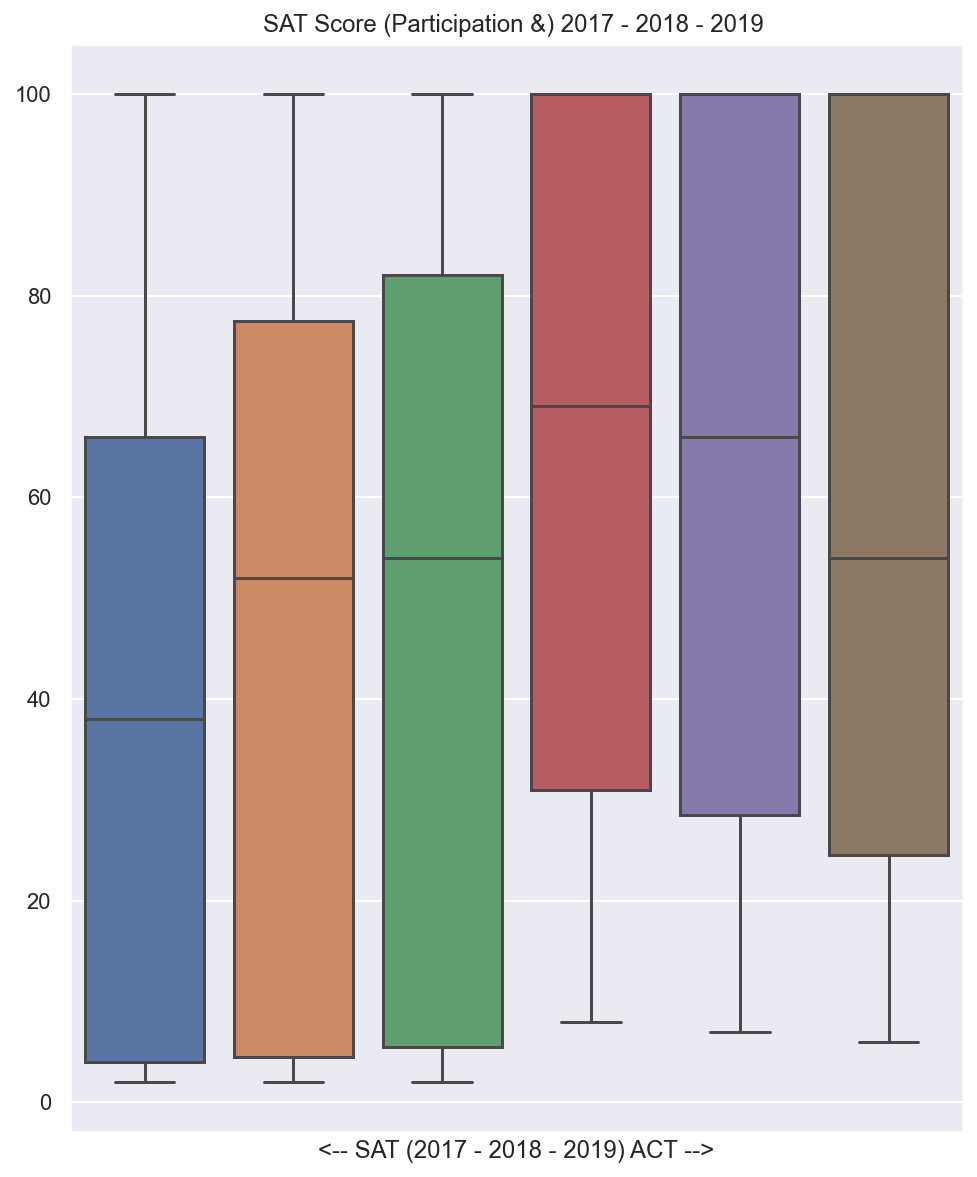

In [188]:
## SAT Vs ACT Participation,

sns.set(font_scale=1)
fig = plt.figure(figsize=(8,10))
sns.boxplot(data = participation_per_comb)
plt.title("SAT Score (Participation &) 2017 - 2018 - 2019 ")
plt.xlabel('<-- SAT (2017 - 2018 - 2019) ACT -->')
plt.xticks([]);

In [189]:
## SAT participation more than 70% - # of states

len(part_sat_17_18_19_scores[(part_sat_17_18_19_scores['sat17_participation_percent'] > 70) |
                         (part_sat_17_18_19_scores['sat18_participation_percent'] > 70) |
                         (part_sat_17_18_19_scores['sat19_participation_percent'] > 70)])

17

In [190]:
## ACT participation less than 30% - # of states

len(part_act_17_18_19_scores[(part_act_17_18_19_scores['act17_participation_percent'] < 30) |
                         (part_act_17_18_19_scores['act18_participation_percent'] < 30) |
                         (part_act_17_18_19_scores['act19_participation_percent'] < 30)])

17

In [191]:
part_act_17_18_19_scores.mean().mean()

61.882352941176464

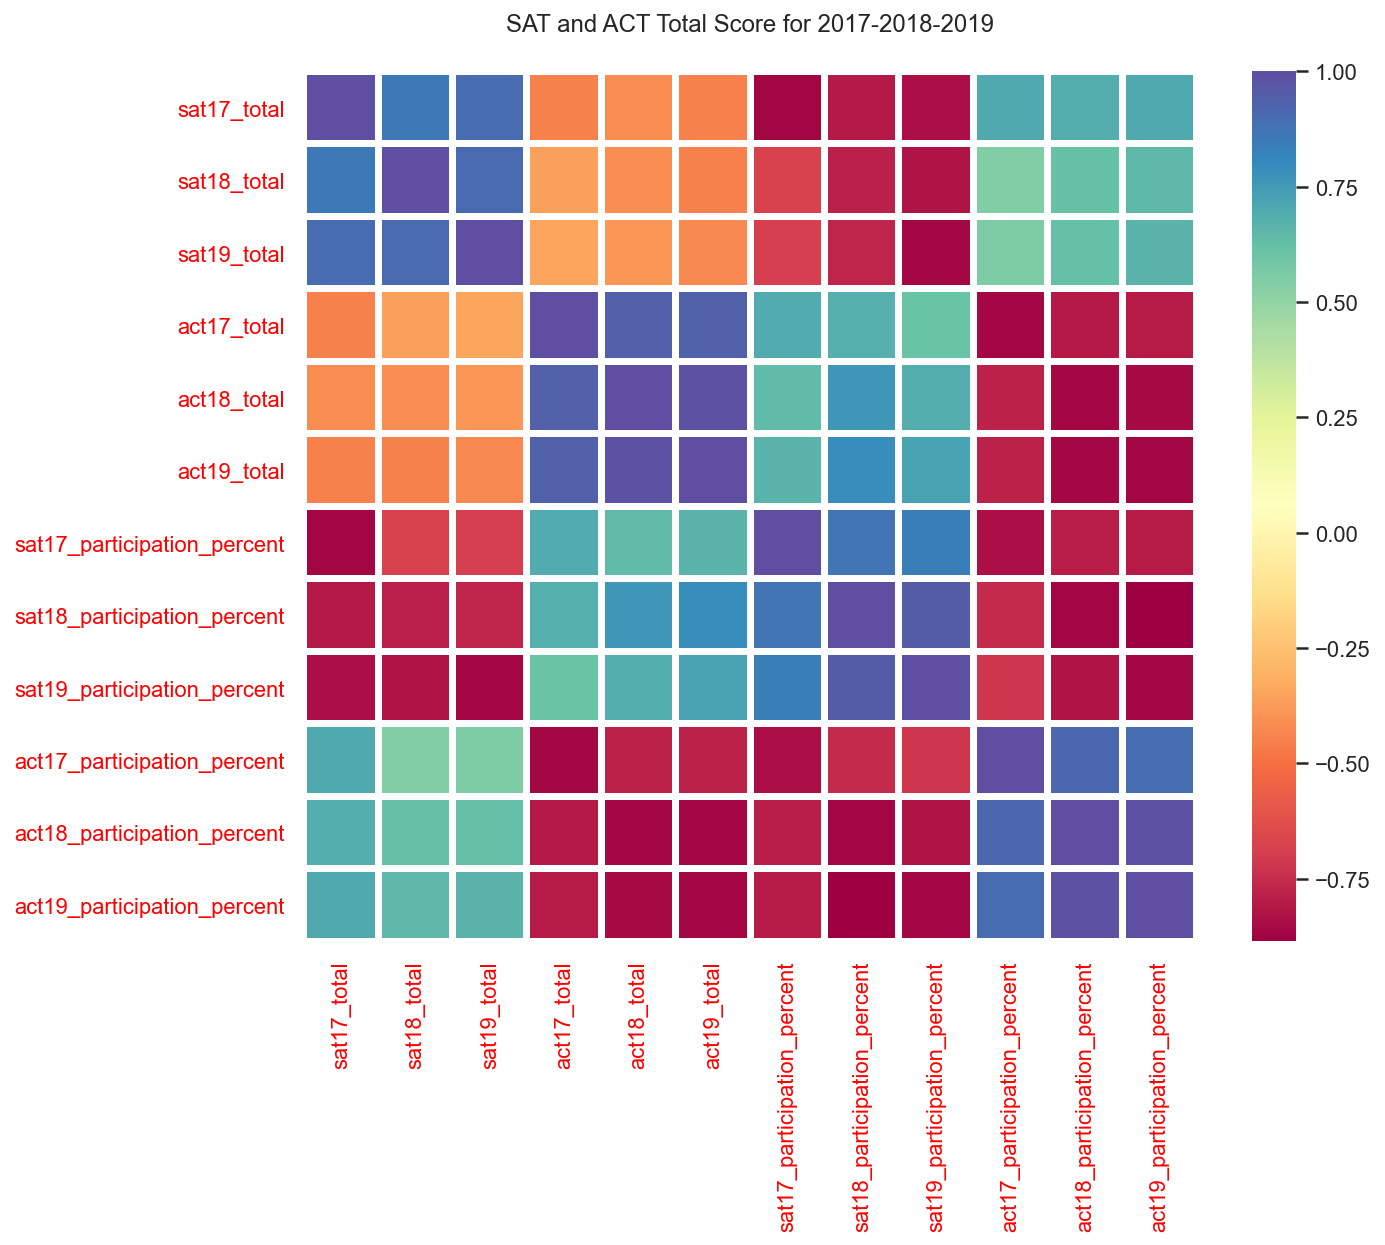

In [192]:
## Total Score versus Participation %

sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.heatmap(sat_both_total_participation_corr, linecolor='white',linewidths=3, cmap='Spectral')
plt.xticks( color='red')
plt.yticks(color='red')
plt.title("SAT and ACT Total Score for 2017-2018-2019",pad=20);

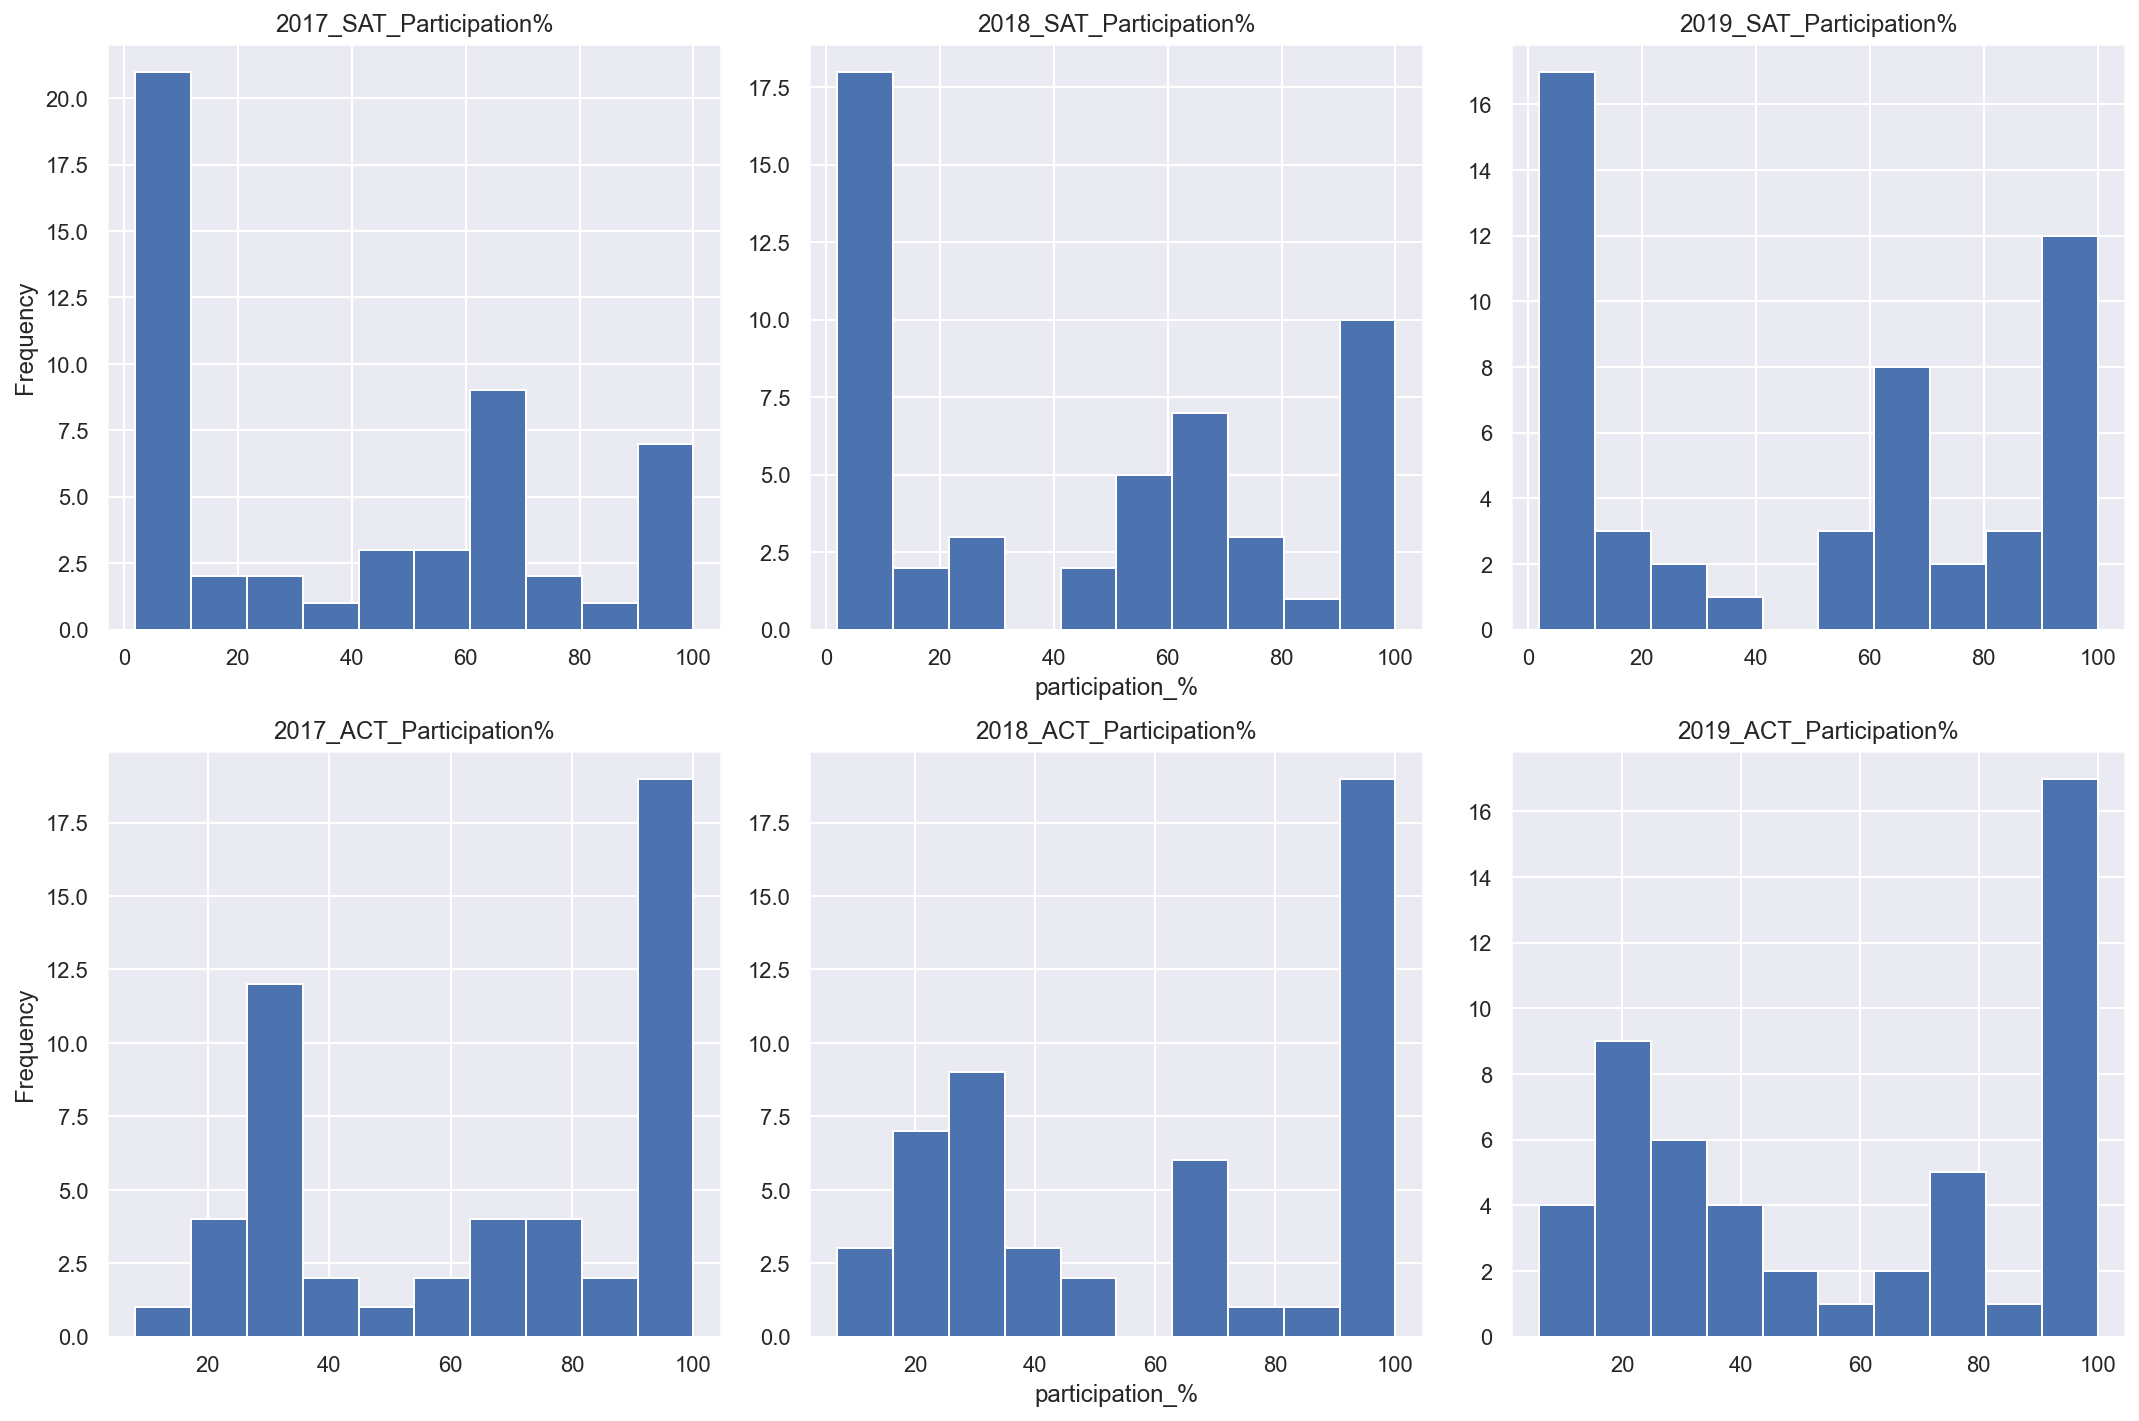

In [193]:
## BiModal Distributions

subplot_histograms(final_17_18_19_sat_act,select_participation,title_participation,xlabels_participation,ylabels_participation)

In [194]:
## Requires Attention!  -- Hawaii
hawaii_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  sat18_participation_percent  \
states                                                             
Hawaii                         55.0                         56.0   

        sat19_participation_percent  
states                               
Hawaii                         54.0

In [195]:
hawaii_all[['act17_participation_percent','act18_participation_percent','act19_participation_percent']]

act17_participation_percent  act18_participation_percent  \
states                                                             
Hawaii                         90.0                         89.0   

        act19_participation_percent  
states                               
Hawaii                         80.0

In [196]:
## Requires Attention!  -- District of Columbia
distcolumbia_all[['sat17_participation_percent','sat18_participation_percent','sat19_participation_percent']]

sat17_participation_percent  \
states                                              
District Of Columbia                        100.0   

                      sat18_participation_percent  sat19_participation_percent  
states                                                                          
District Of Columbia                         92.0                         94.0

 **Final Statement - Conclusion**
 + From the box plot above it's clear that on Avg. atleast 60% of States participate in ACT while less than 50% of the States participate in SAT.
 + The strong non-collinearity between Total Score and Participation Percentages is a matter of concern too.
 + SAT - Math and ERW scores possess strong colliearity
 + Most of the Distributions, specially various Participation Rates and the Total Scores are BiModal in nature i.e not distribued normally, possible factors like mandatory SAT/ACT tests classifies candidates into High Scoring and Low Scoring Candidates. Some have all the facilities and want to take the test, while the other just have to.

## Recommendations

 **Recommendations**
+ Investigate what strategies / implementations went right for States with increasing participation rates. This includes States like New York, Maryland, New Jersey, Maine, West Virginia, Colorado, Florida, Idaho, Illinois and Rhode Island. Like this one [SAT scores drop for 2019 class, but participation rises through testing in schools][1]
+ Research show giving 'FREE' SAT tests is a key strategy and should be applied for all states. <br>
+ Focusing more on States like Hawaii might help. 
     * Hawaii displayed alsmost same Participation % for 3 years (55% -> 56% -> 54%) for SAT, while the ACT participation rates have dropped from 90% in 2017 to 80% in 2019, unlike other states where the participation rates usually transfer from ACT to SAT and vice-versa.
+ District of Columbia, is another example of a state where SAT participation rates dropped from 100% in 2017 to 94% in 2019. We should definitely get some insights on what went wrong.

**Based on Research**
+ Previous changes like Dropping Essay Requirement, changing Exam Duration to 3hrs and engage into contracts with states and schools to make SAT's affordable are all in right direction. We should expand these ideas to other states with low SAT scores too. DataFrame right underneath this section backs this statement. [Reference - 2016 regulations][2]




[1]: https://www.washingtonpost.com/local/education/sat-scores-drop-for-2019-class-but-participation-rises-through-testing-in-schools/2019/09/23/332fc4d0-de11-11e9-8dc8-498eabc129a0_story.html "FREE SAT Strategy"

[2]: https://www.washingtonpost.com/local/education/sat-scores-drop-for-2019-class-but-participation-rises-through-testing-in-schools/2019/09/23/332fc4d0-de11-11e9-8dc8-498eabc129a0_story.html "2016 Regulations for SAT's"

In [197]:
## Participation Growth after new regulations were passed in 2016

sat_participation_2017_18_19.sort_values('sat17_participation_percent', ascending = False)

states  sat17_participation_percent  \
6            Connecticut                        100.0   
7               Delaware                        100.0   
8   District Of Columbia                        100.0   
22              Michigan                        100.0   
12                 Idaho                         93.0   
9                Florida                         83.0   
39          Rhode Island                         71.0   
5               Colorado                         11.0   
13              Illinois                          9.0   

    sat18_participation_percent  sat19_participation_percent  
6                         100.0                        100.0  
7                         100.0                        100.0  
8                          92.0                         94.0  
22                        100.0                        100.0  
12                        100.0                        100.0  
9                          56.0                        100.0  
39                         97.0                        100.0  
5                         100.0                        100.0  
13                         99.0                        100.0

## What Next!

**Scope of this Project**

+ I would like to consider different factors outside of this dataset including but not limited to Racial Impact 
[SAT's Racial Impact][3]

[3]: https://www.insidehighered.com/news/2015/10/27/study-finds-race-growing-explanatory-factor-sat-scores-california "SAT's Racial Impact"